# Advance Regression Assinment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

# Step 1 - Import all required packages and load the data set

In [431]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import numpy and pands packages
import numpy as np
import pandas as pd

# Import all visualization Librariries
import matplotlib.pyplot as plt
import seaborn as sns

# Set max rows display
pd.set_option('display.max_rows', 100)

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression

import os


In [432]:
# Import dataset

ds = pd.read_csv('train.csv')
ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Step 2 - Start with EDA

In [433]:
# Shape of the dataset
ds.shape

(1460, 81)

In [434]:
# Information of data
ds.info()
# There are many missing value columns present in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [435]:
# Check missing values
ds_mean_missing = ds.isna().mean()
ds_mean_missing[ds_mean_missing != 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

### Below list of columns are having high missing values and can be removed from dataset
- PoolQC	99.52%
- MiscFeature	96.30%
- Alley	93.77%
- Fence	80.75%
- MasVnrType	59.73%
- FireplaceQu	47.26%
- LotFrontage	17.74%

In [436]:
# Remove all columns whose missing pecentage values are more than 6%
ds.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage'], axis = 1, inplace = True)

In [437]:
# Updated Shape of Dataset
ds.shape

(1460, 74)

### Treatement of null values for below columns

- GarageType      0.055479
- GarageYrBlt     0.055479
- GarageFinish    0.055479
- GarageQual      0.055479
- GarageCond      0.055479
- BsmtFinType2    0.026027
- BsmtExposure    0.026027
- BsmtFinType1    0.025342
- BsmtCond        0.025342
- BsmtQual        0.025342
- MasVnrArea      0.005479
- Electrical      0.000685

In [438]:
# Value Counts of below columns
print('GarageType: ',ds['GarageType'].value_counts())
print('==================================================================')
print('GarageYrBlt: ',ds['GarageYrBlt'].value_counts())
print('==================================================================')
print('GarageFinish: ',ds['GarageFinish'].value_counts())
print('==================================================================')
print('GarageQual: ',ds['GarageQual'].value_counts())
print('==================================================================')
print('GarageCond: ',ds['GarageCond'].value_counts())
print('==================================================================')
print('BsmtFinType2: ',ds['BsmtFinType2'].value_counts())
print('==================================================================')
print('BsmtExposure: ',ds['BsmtExposure'].value_counts())
print('==================================================================')
print('BsmtFinType1: ',ds['BsmtFinType1'].value_counts())
print('==================================================================')
print('BsmtCond: ',ds['BsmtCond'].value_counts())
print('==================================================================')
print('BsmtQual: ',ds['BsmtQual'].value_counts())
print('==================================================================')
print('MasVnrArea: ',ds['MasVnrArea'].value_counts())
print('==================================================================')
print('Electrical: ',ds['Electrical'].value_counts())

GarageType:  GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageYrBlt:  GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
19

In [439]:
# Below list of columns can be treated with mode as these categorical variables are having standard count of levels
# GarageType, GarageFinish, GarageQual, GarageCond, 
# BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, Electrical

tret_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']

for col in tret_cols:
    
    ds[col] = ds[col].fillna(ds[col].mode()[0])

In [440]:
# MasVnrArea, GarageYrBlt are contineous variables
ds[['MasVnrArea', 'GarageYrBlt']].describe(percentiles=[.3, .6, .7, .9, .99])

MasVnrArea  GarageYrBlt
count  1452.000000  1379.000000
mean    103.685262  1978.506164
std     181.066207    24.689725
min       0.000000  1900.000000
30%       0.000000  1965.000000
50%       0.000000  1980.000000
60%      16.000000  1993.000000
70%     117.000000  1999.000000
90%     335.000000  2006.000000
99%     791.920000  2009.000000
max    1600.000000  2010.000000

In [441]:
# MasVnrArea is having outliars and can be treated with median
ds['MasVnrArea'] = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())

# GarageYrBlt is normal and can be treated with mean
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())

In [442]:
# Check missing values
ds_mean_missing = ds.isna().mean()
ds_mean_missing.sort_values(ascending=False)

Id               0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
MSSubClass       0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

In [443]:
# Remove Id columns
ds.drop(['Id'], axis = 1, inplace = True)

In [444]:
#Categorical columns
cat_cols = list(ds.select_dtypes(include='object').columns)

In [445]:
# Numeric columns
num_cols = list(ds.select_dtypes(exclude='object').columns)

In [446]:
ds[num_cols].nunique().sort_values(ascending=False)

LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
GarageYrBlt        98
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
MSSubClass         15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
OverallCond         9
BedroomAbvGr        8
PoolArea            8
GarageCars          5
YrSold              5
Fireplaces          4
KitchenAbvGr        4
FullBath            4
BsmtFullBath        4
BsmtHalfBath        3
HalfBath            3
dtype: int64

In [447]:
ds[cat_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
Foundation        6
GarageType        6
Heating           6
BsmtFinType2      6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
BldgType          5
GarageCond        5
GarageQual        5
Electrical        5
HeatingQC         5
LotConfig         5
MSZoning          5
ExterCond         5
BsmtExposure      4
BsmtCond          4
ExterQual         4
BsmtQual          4
KitchenQual       4
LandContour       4
LotShape          4
LandSlope         3
GarageFinish      3
PavedDrive        3
Utilities         2
Street            2
CentralAir        2
dtype: int64

### Univariate Analysis

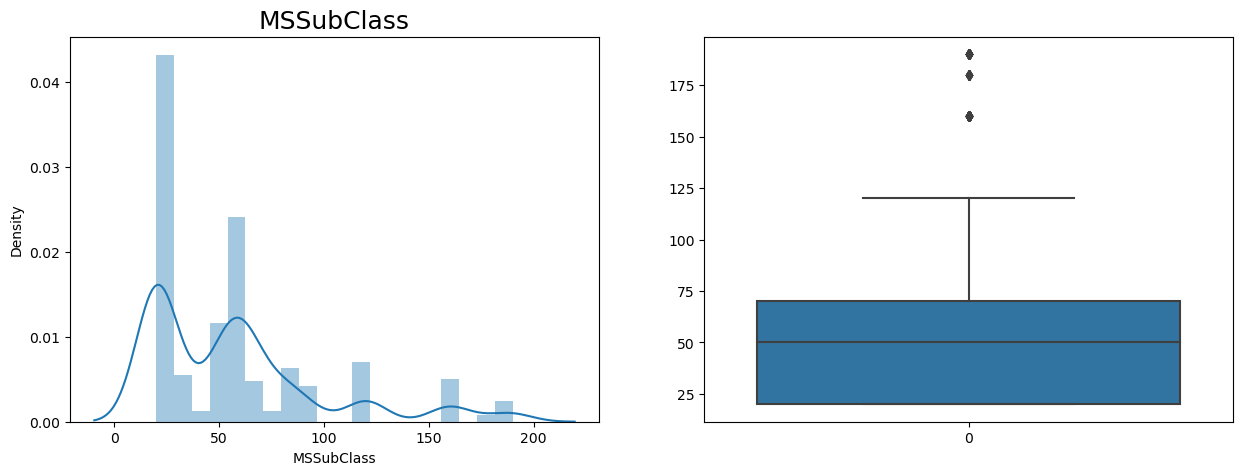

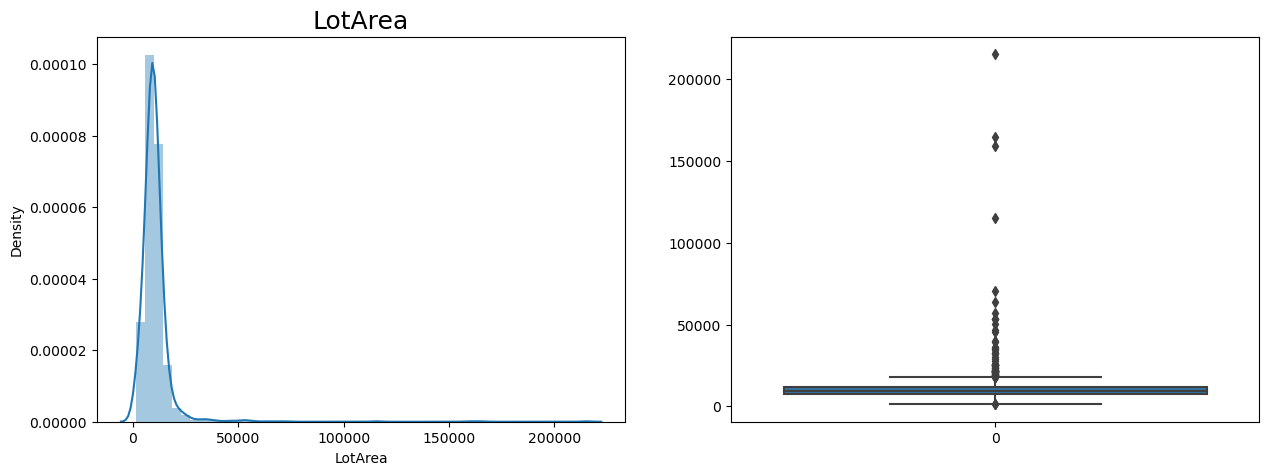

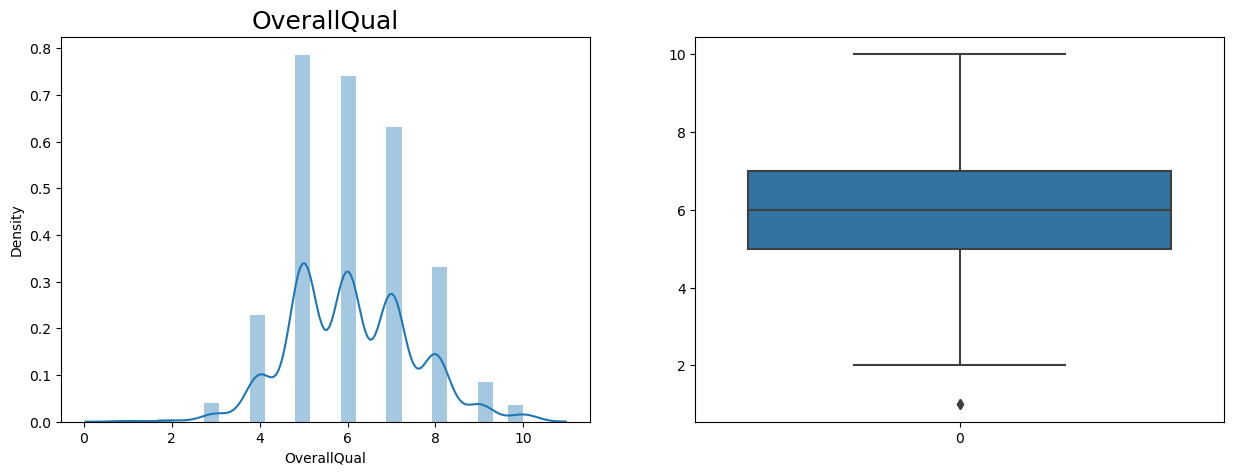

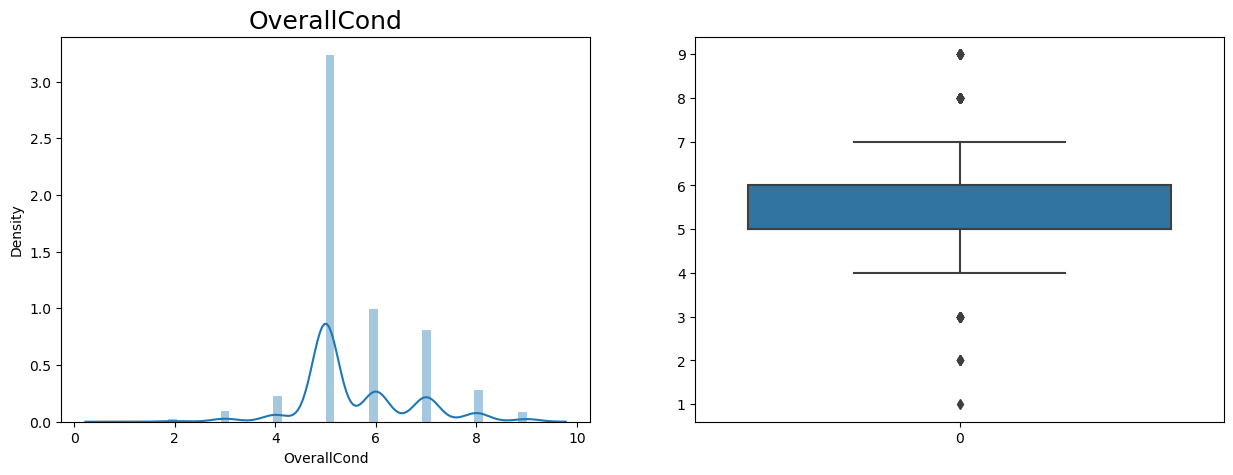

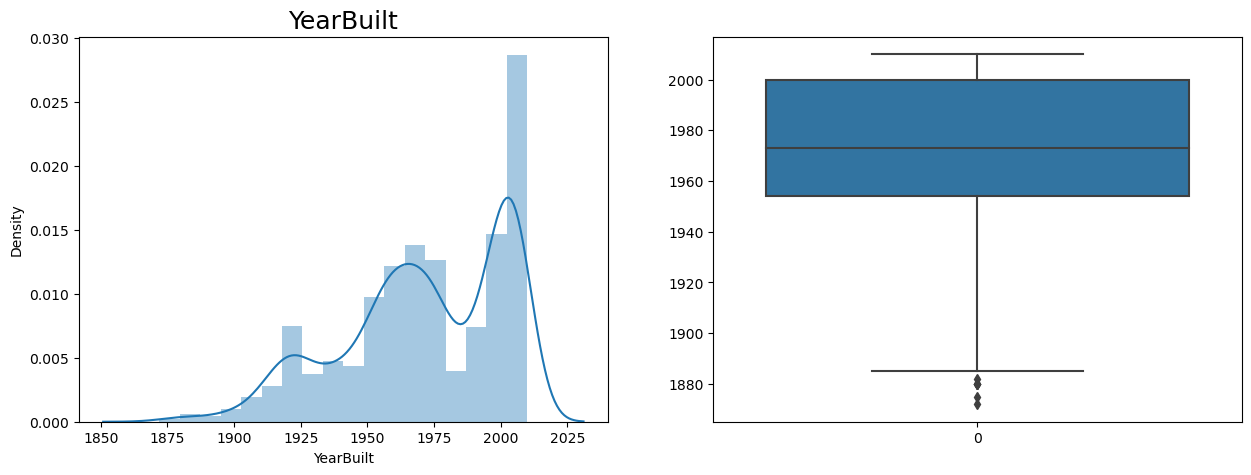

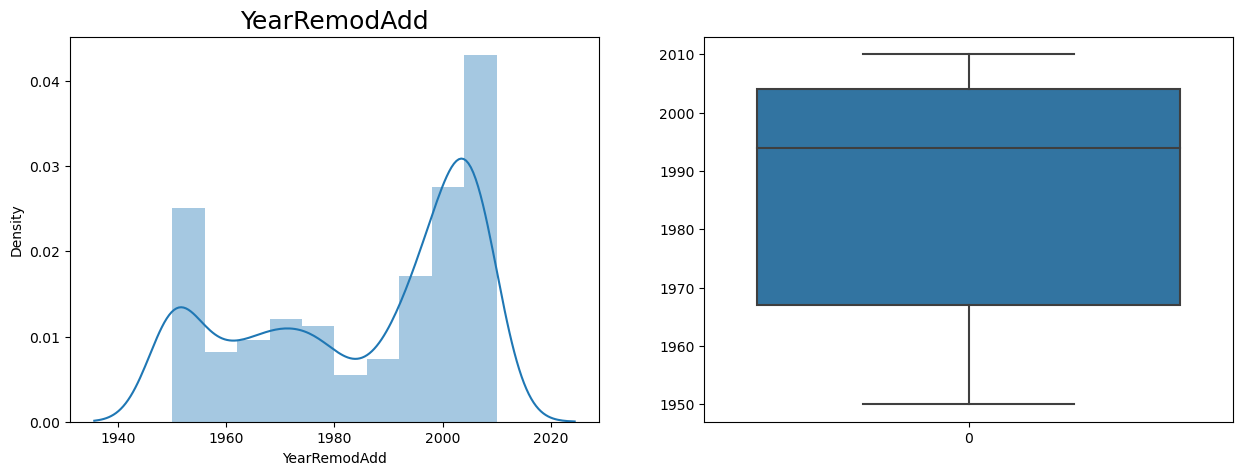

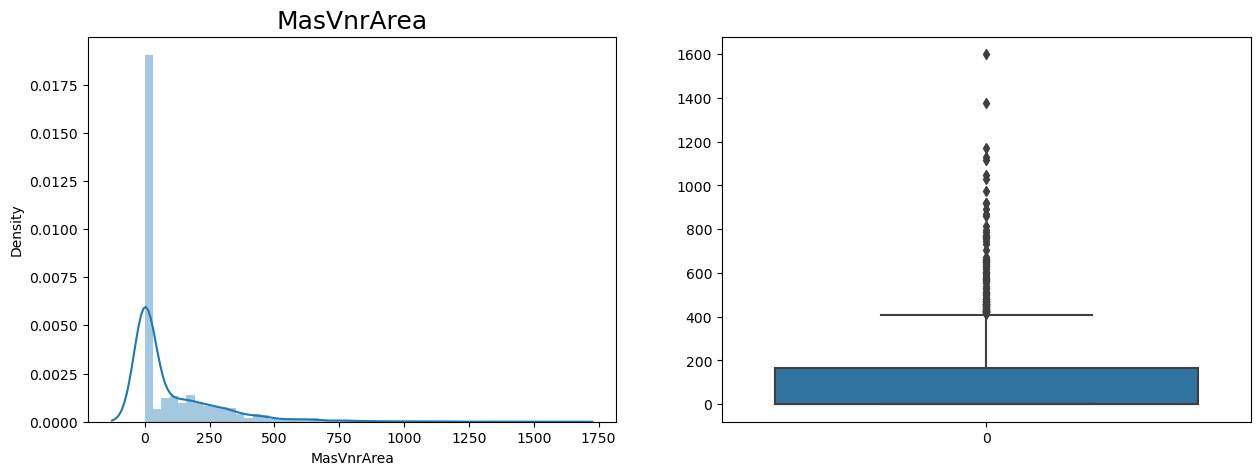

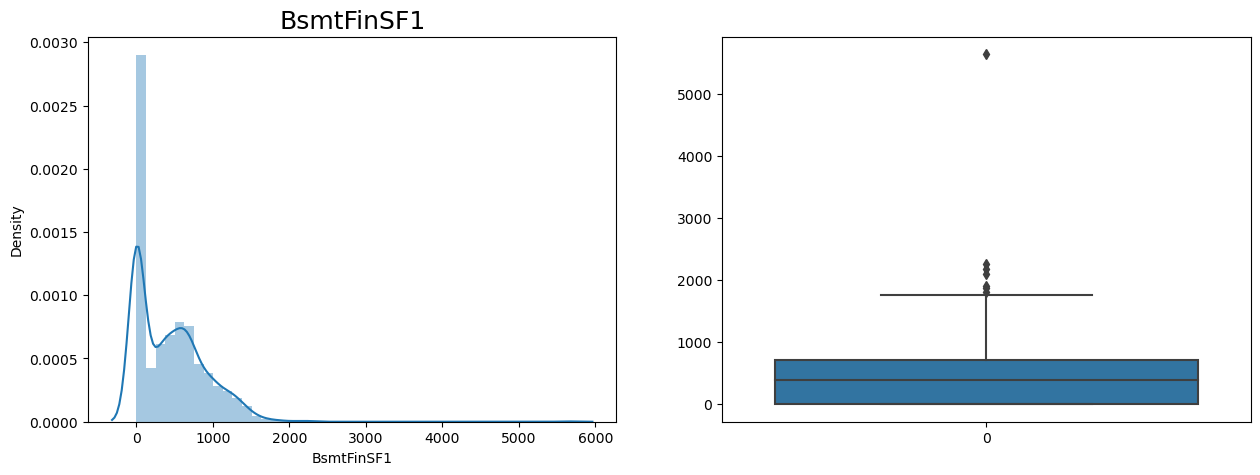

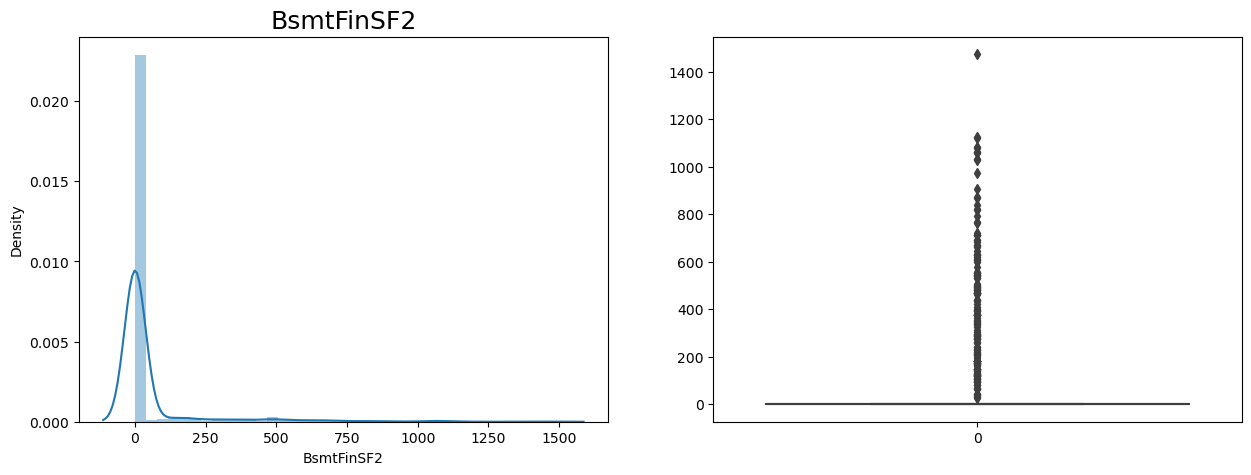

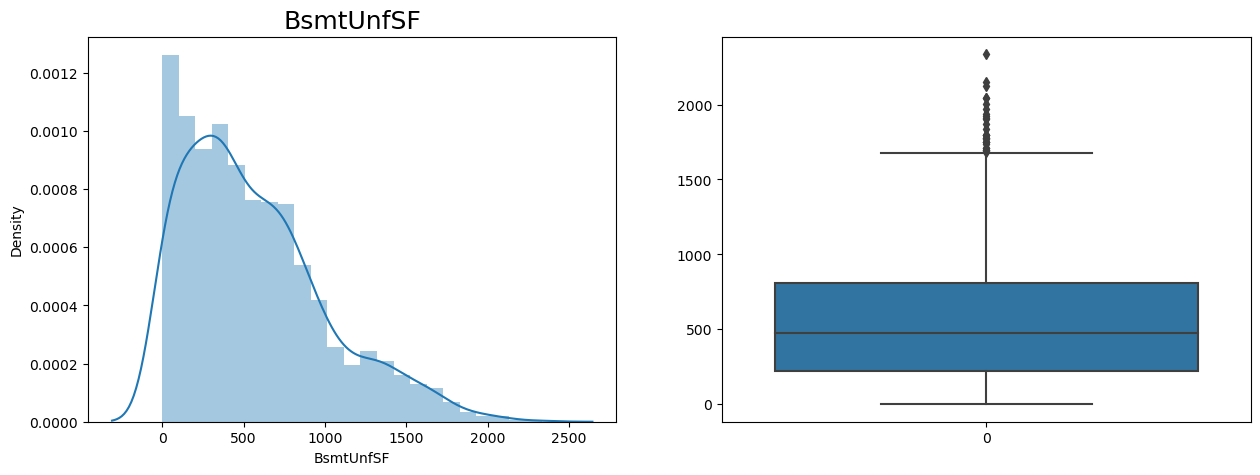

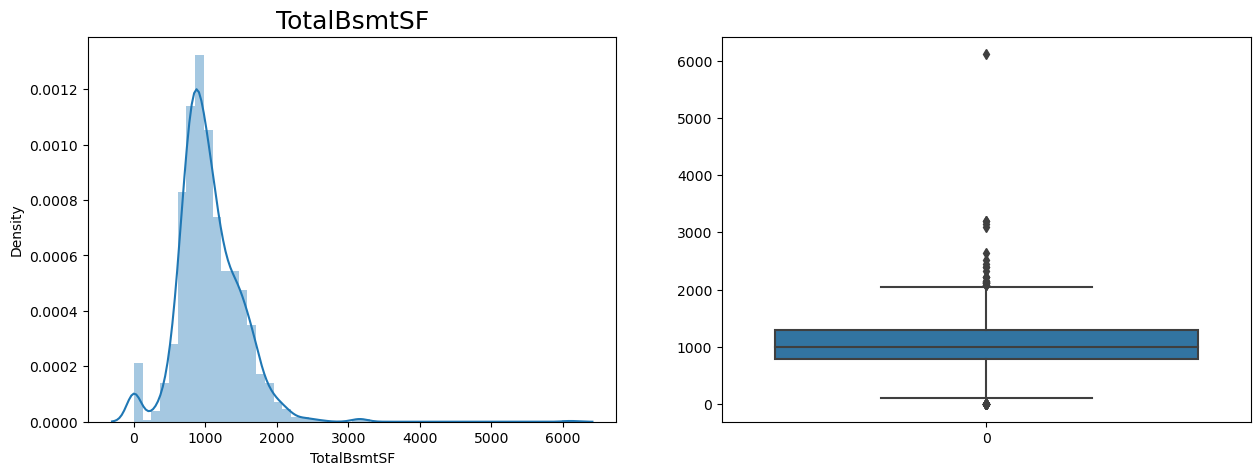

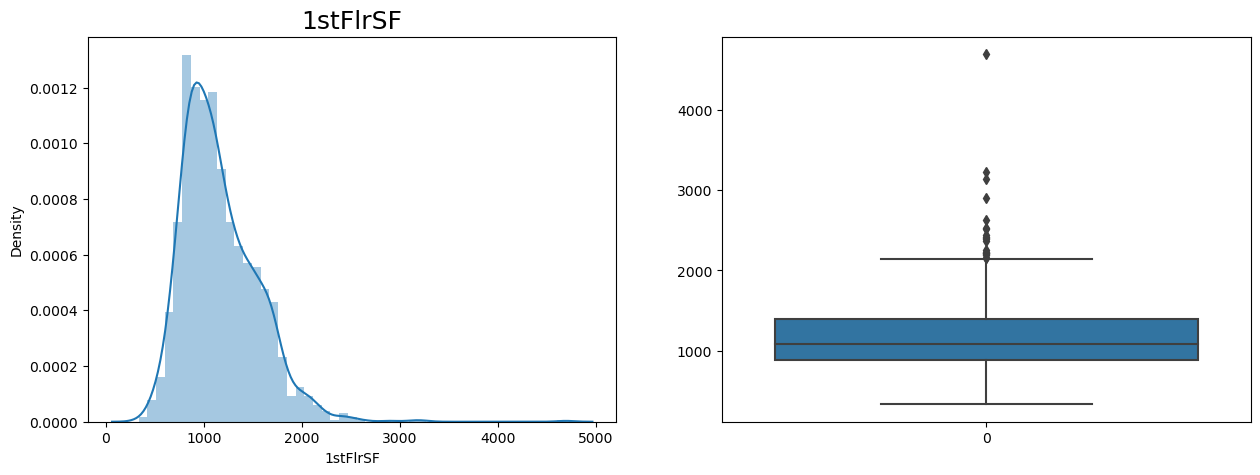

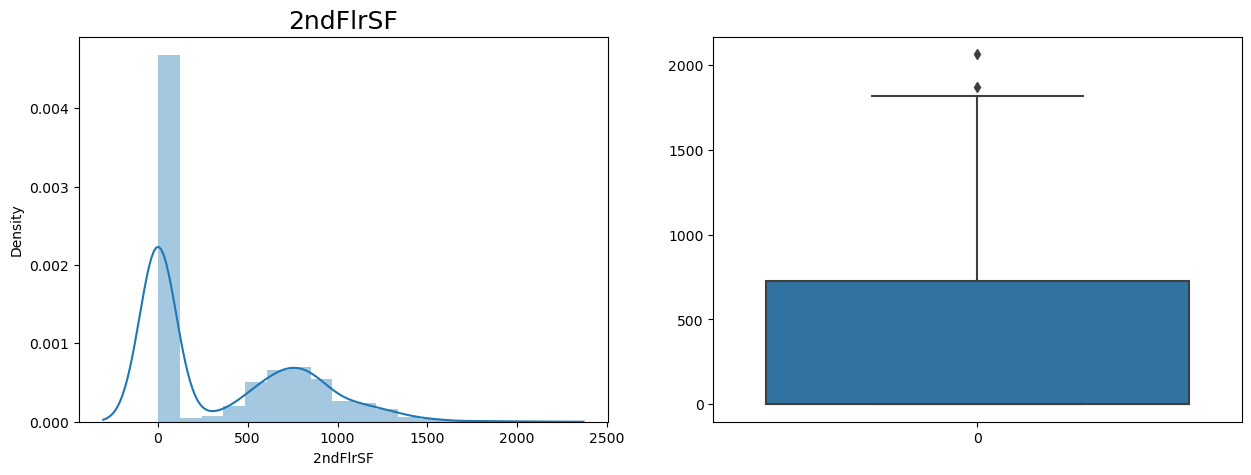

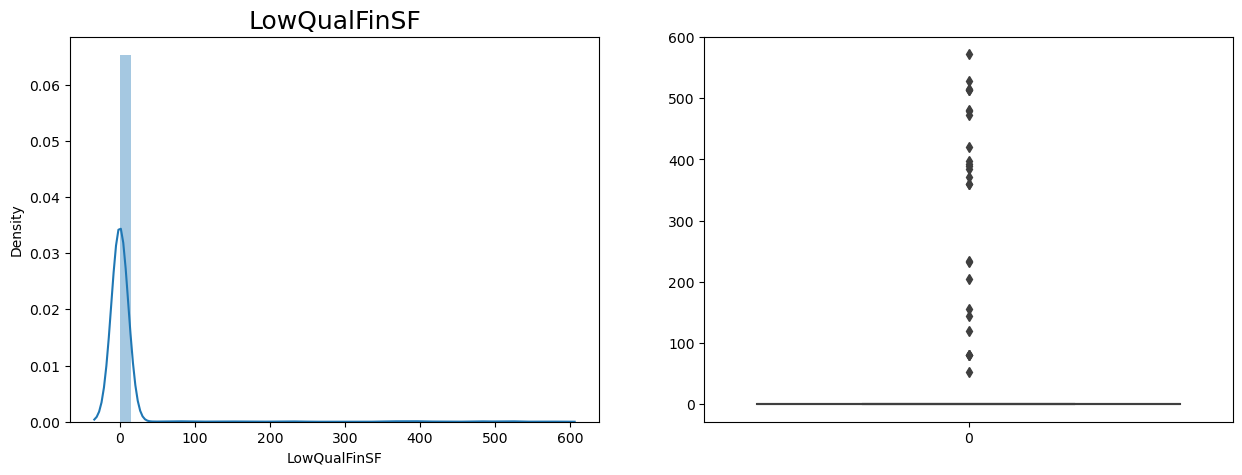

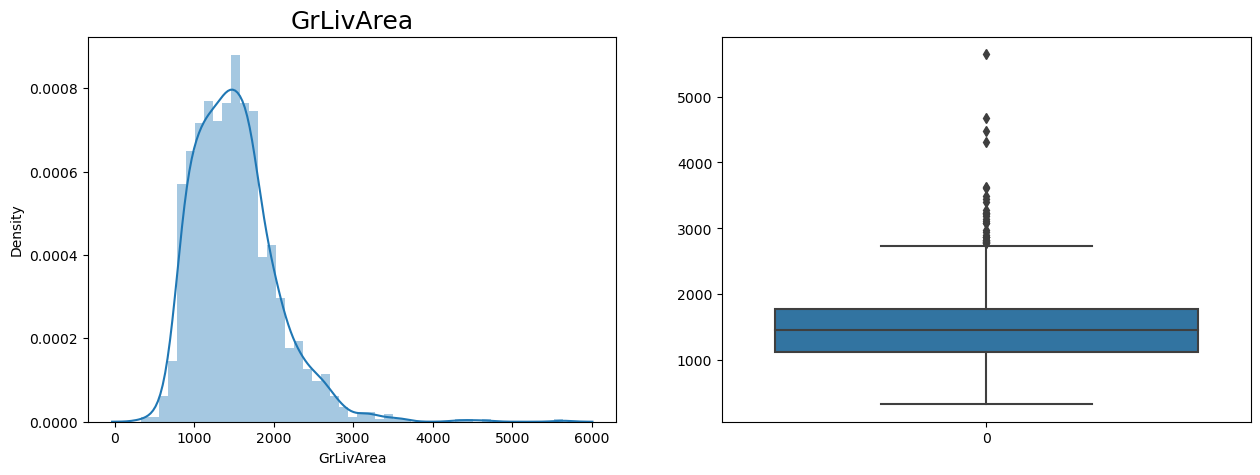

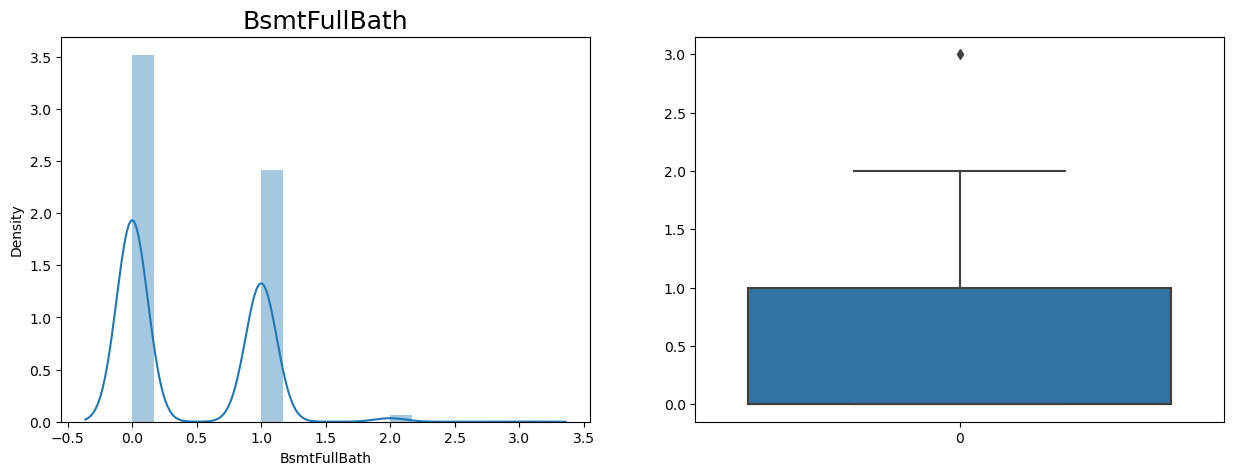

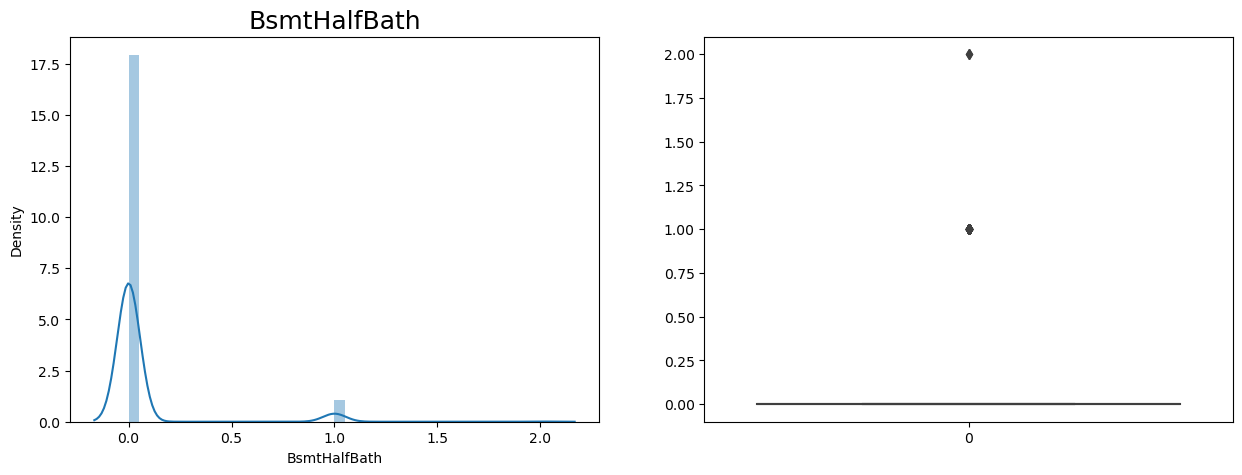

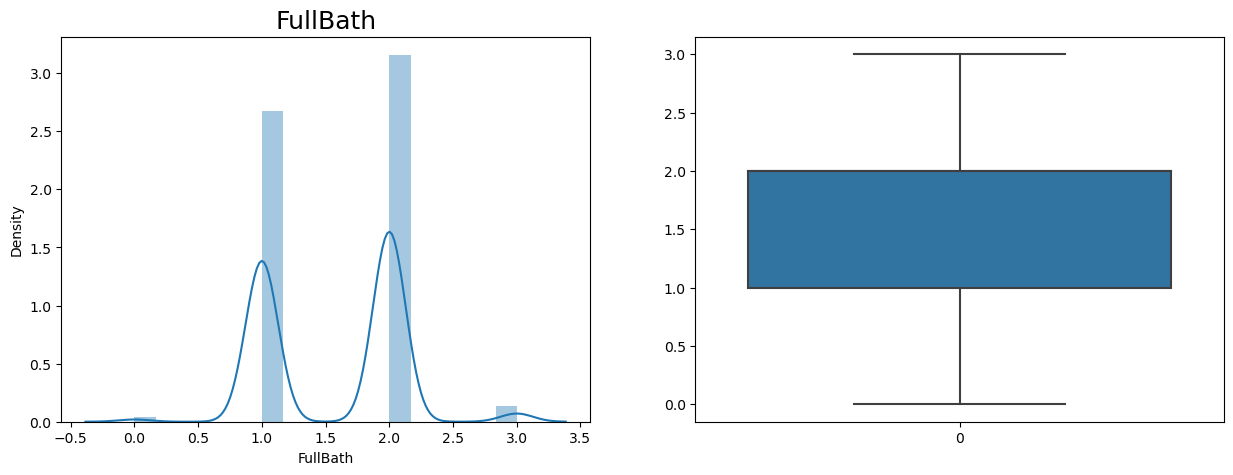

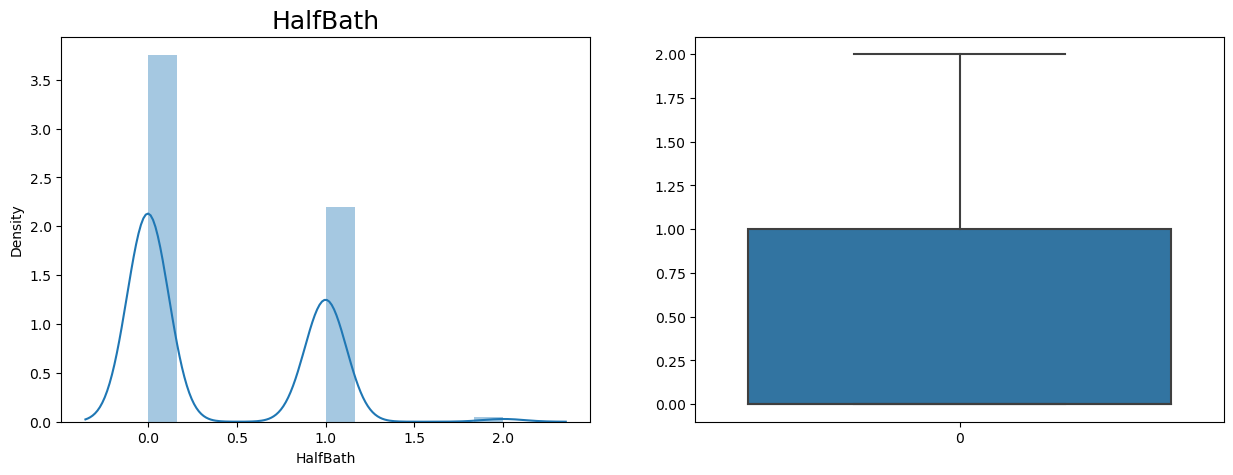

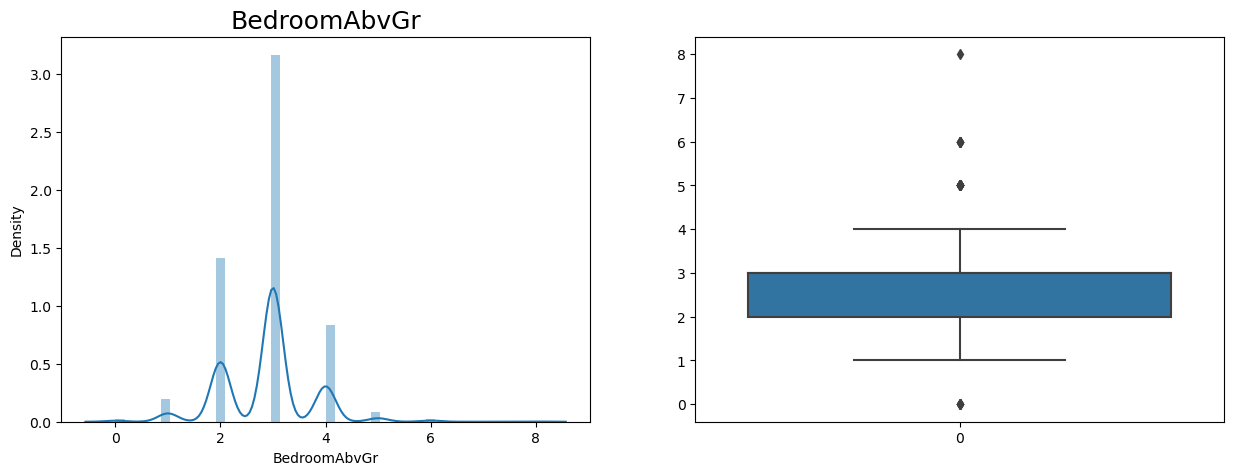

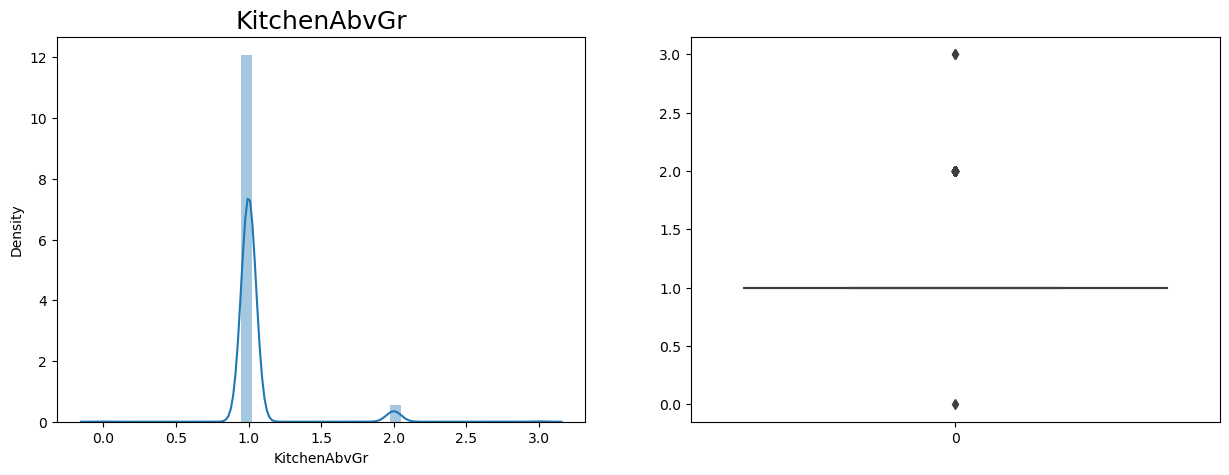

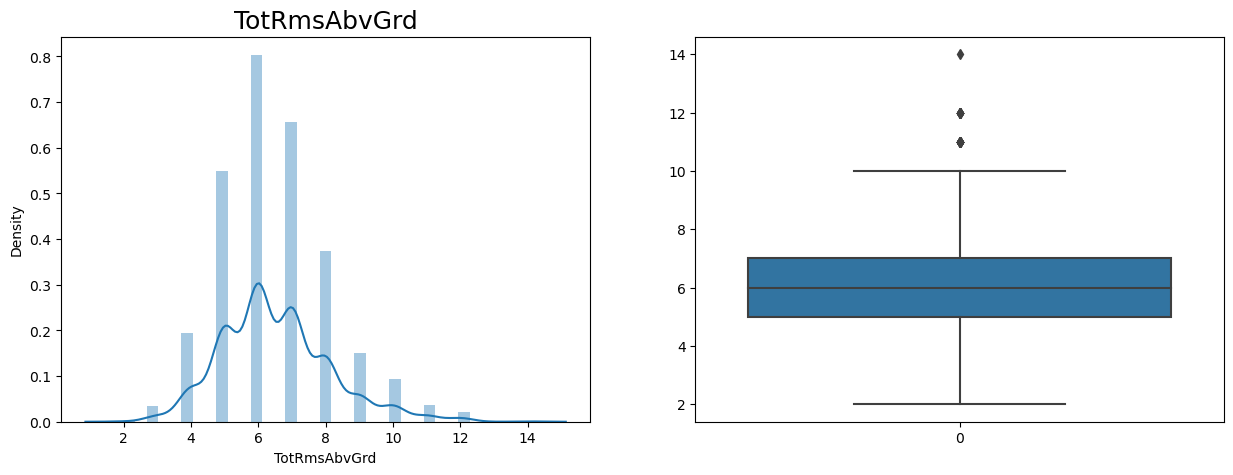

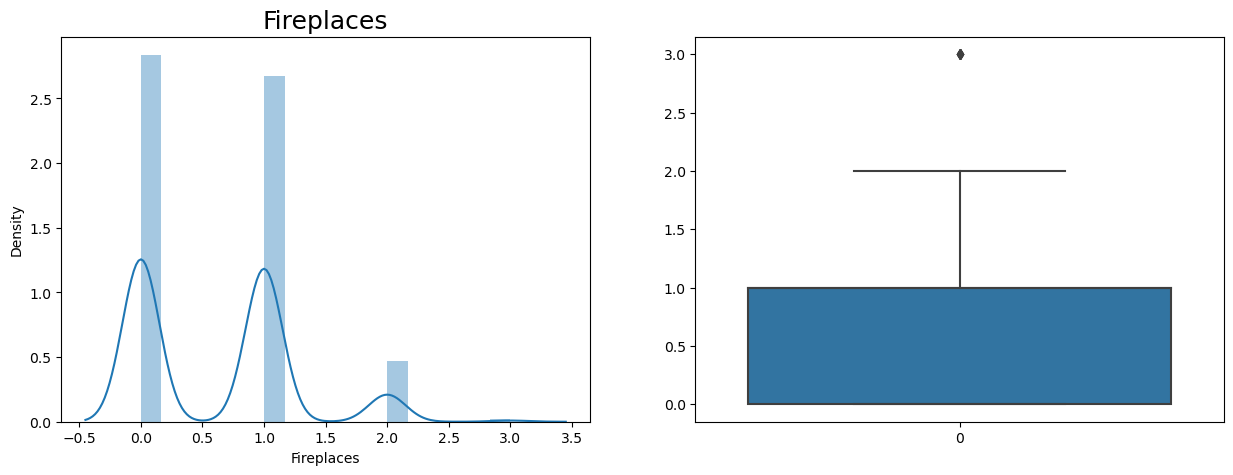

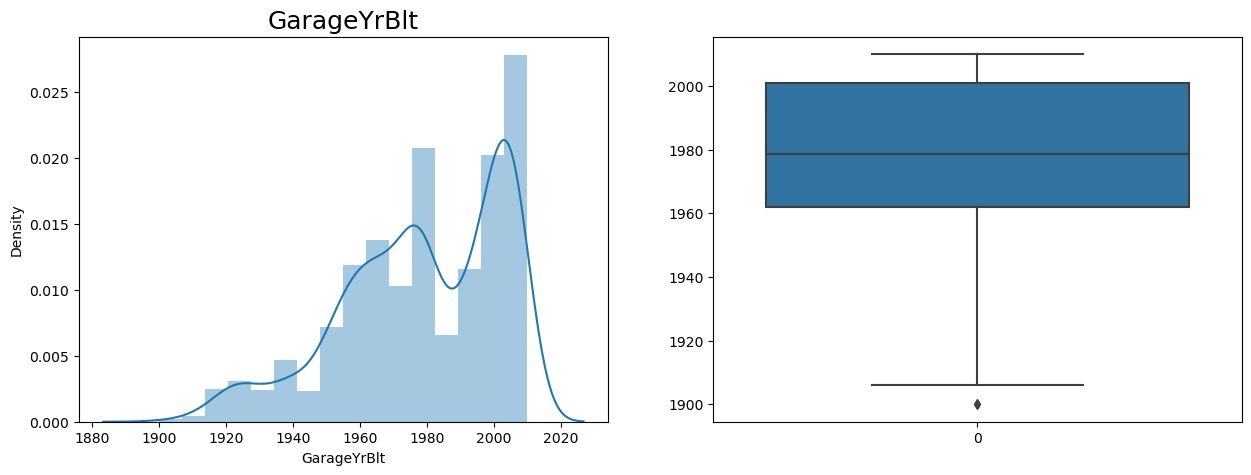

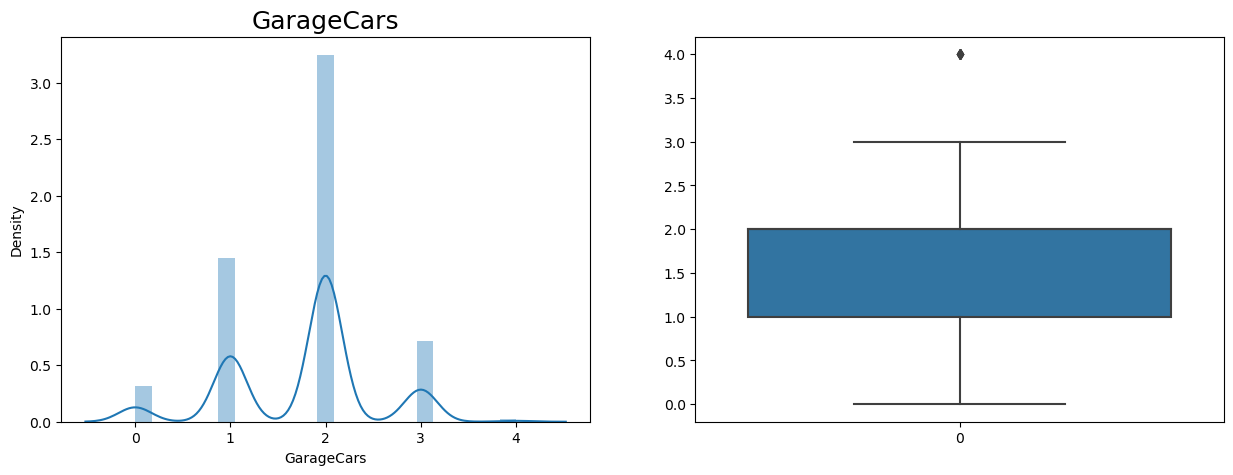

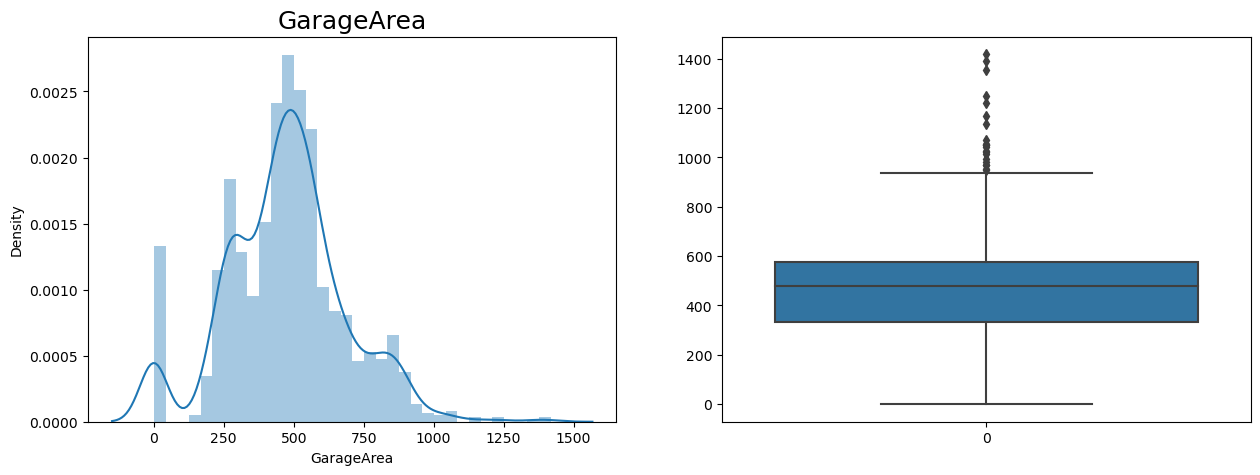

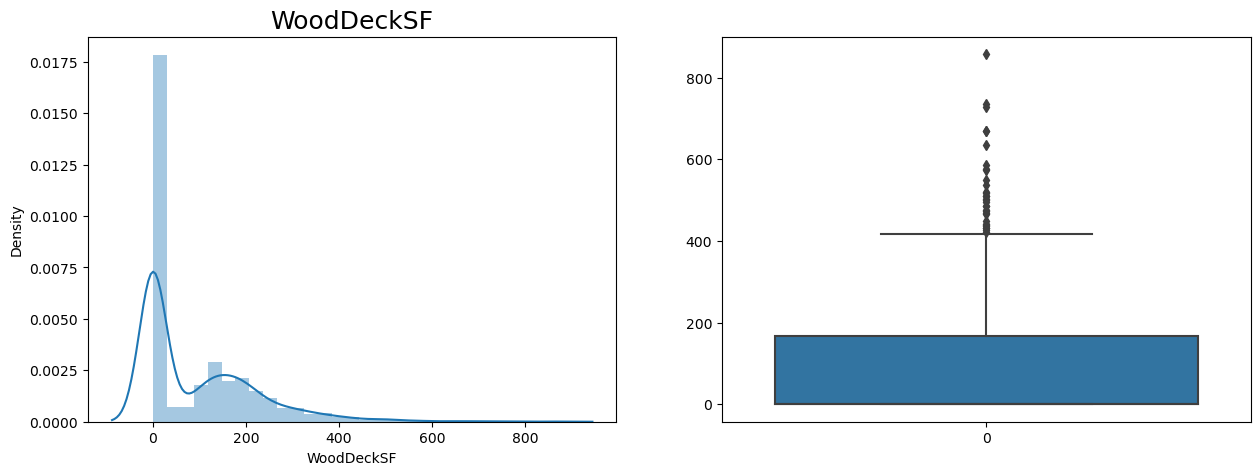

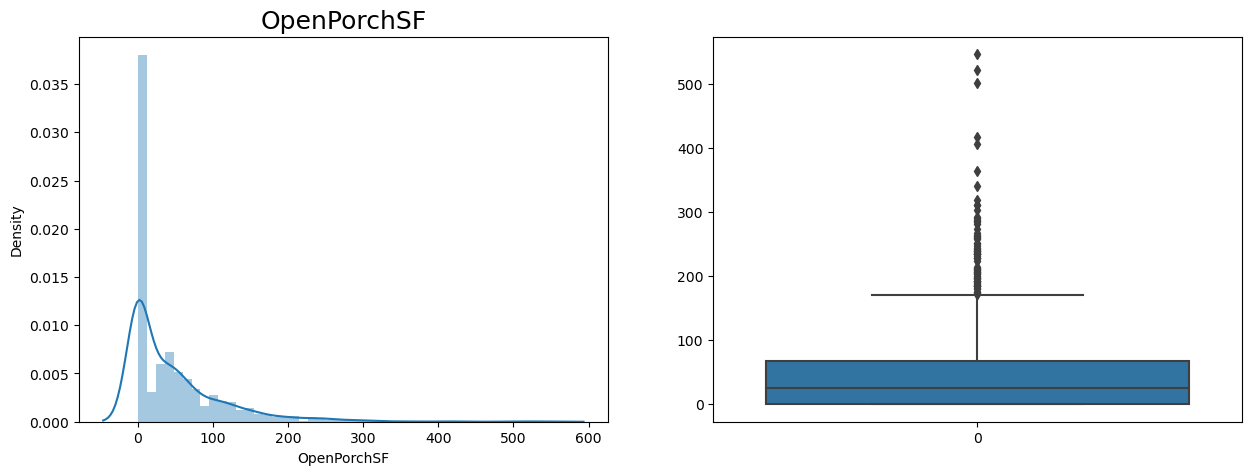

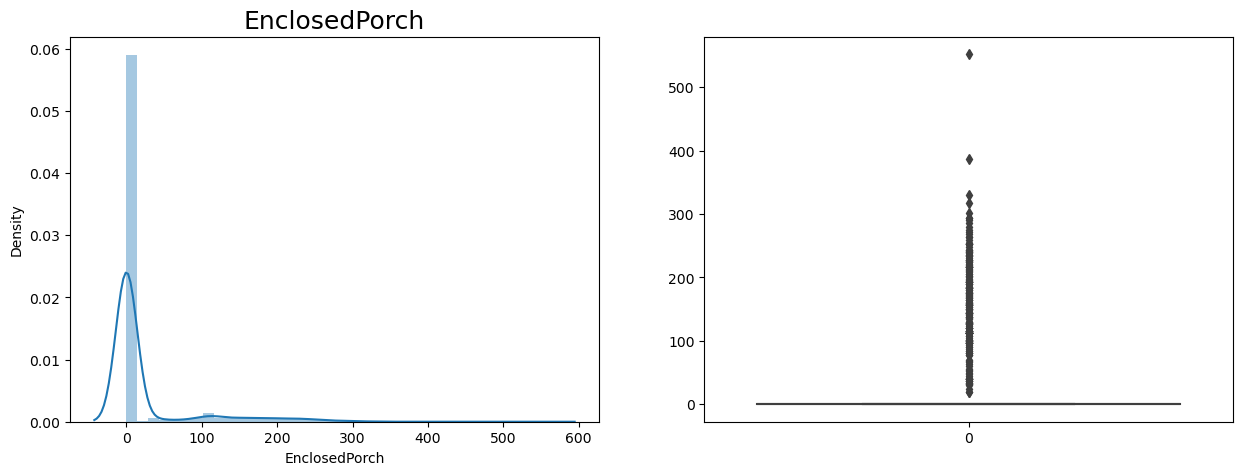

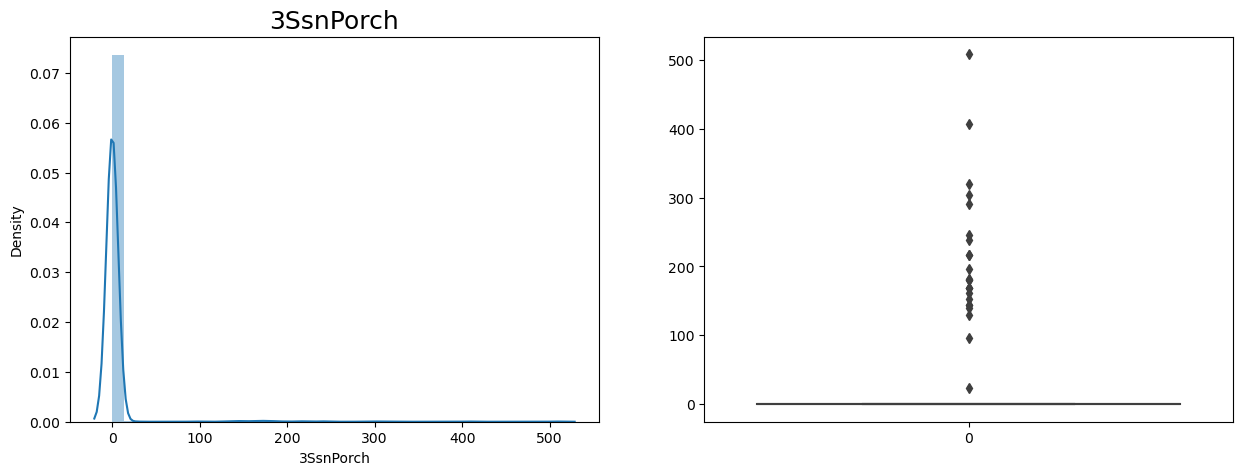

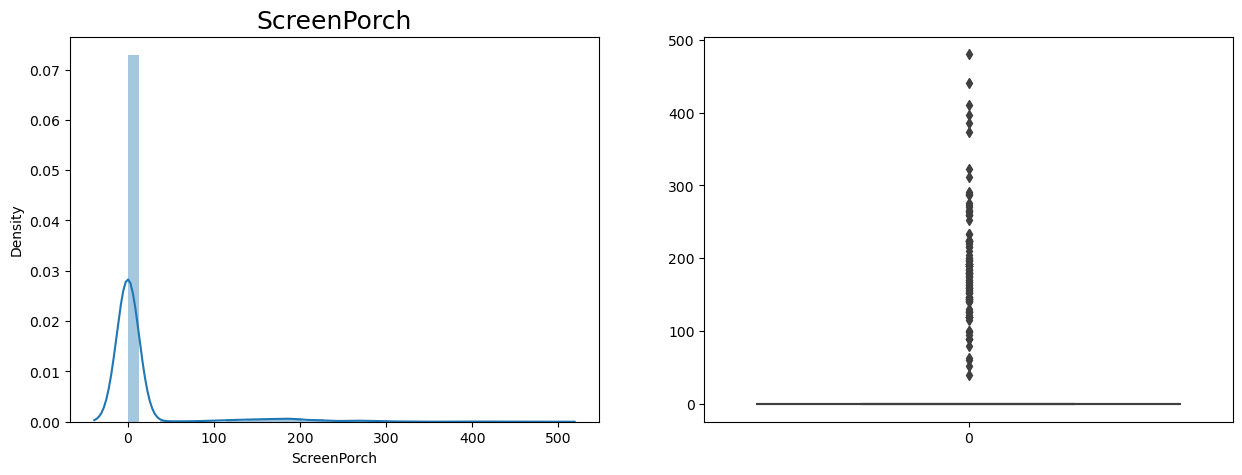

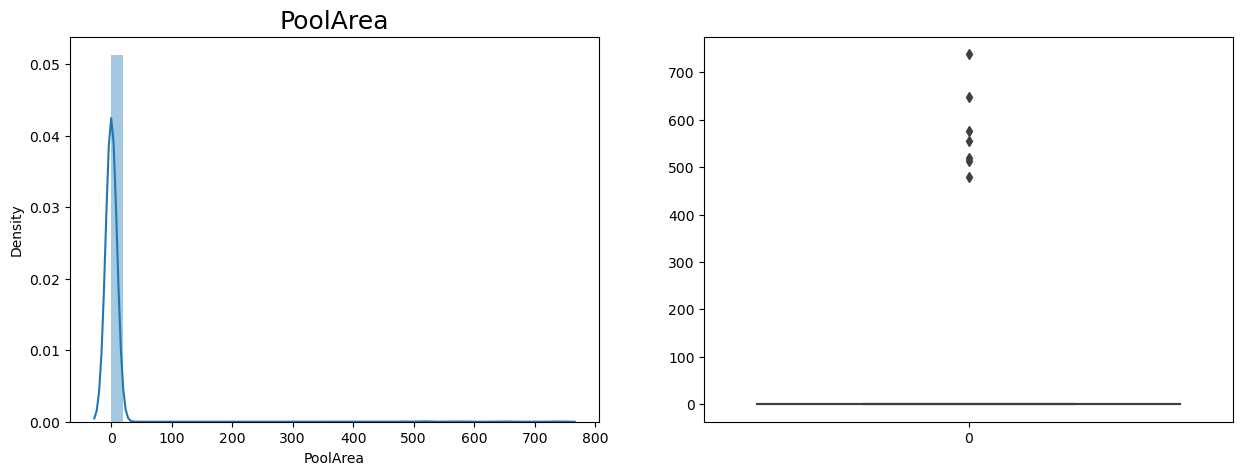

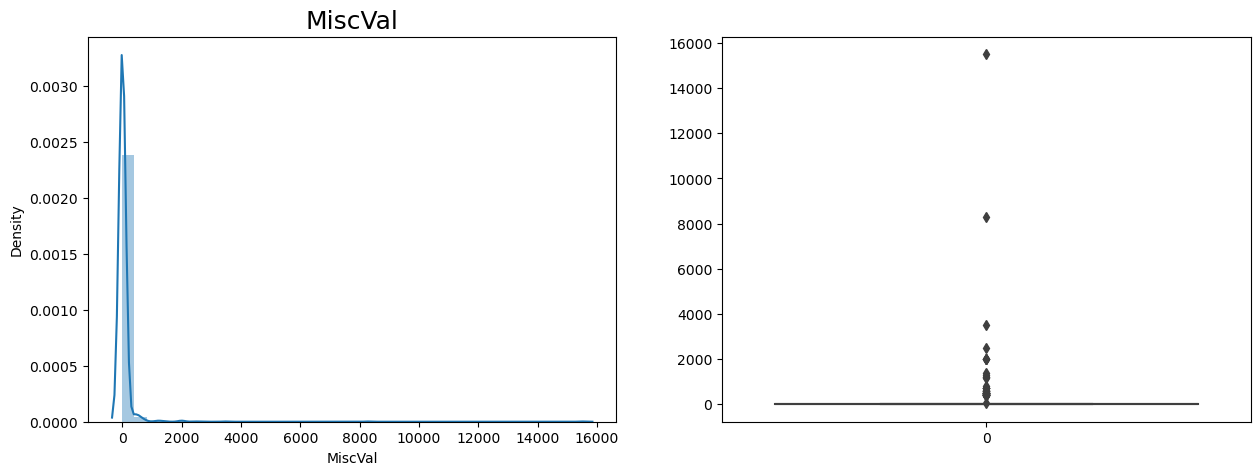

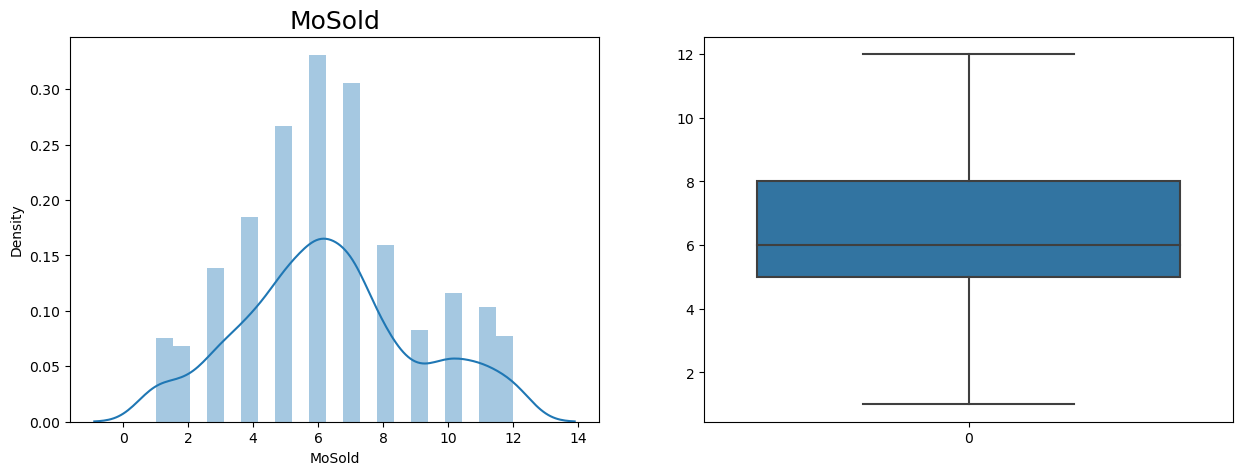

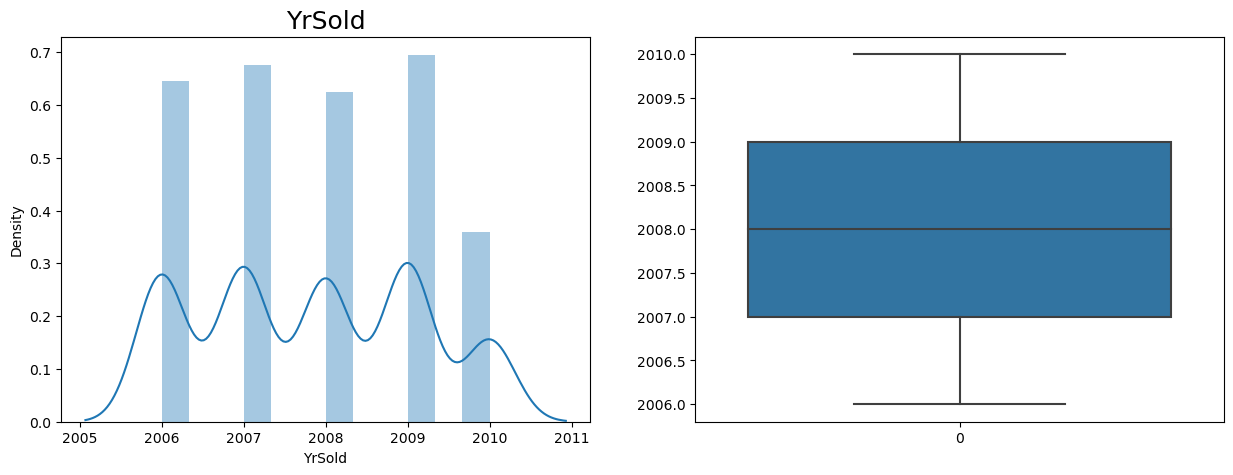

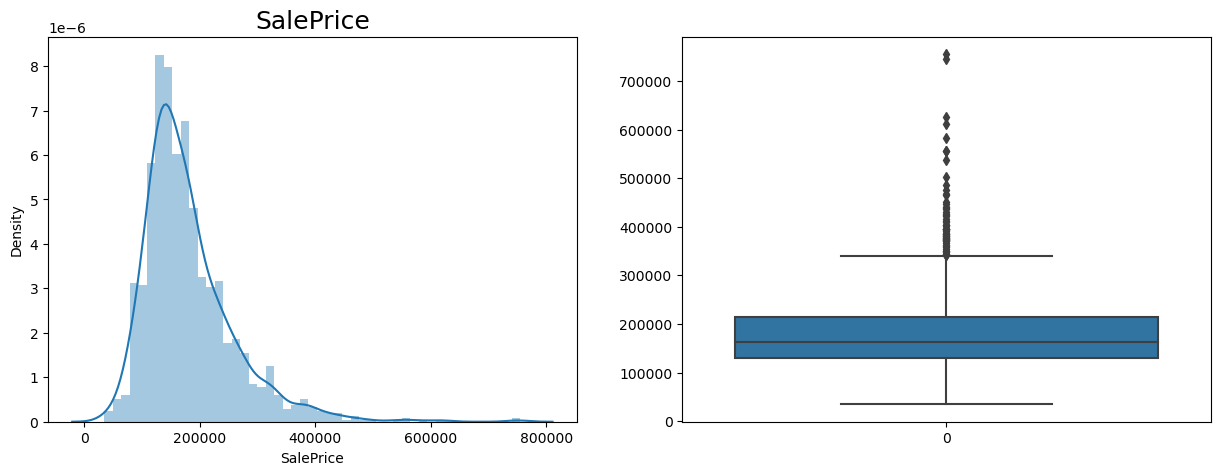

In [448]:
# Plot histograms and boxplots to visualize the distribution of numeric features

for col in num_cols:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(ds[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(ds[col])
    plt.show()

### Inferences from Numeric Univariate analysis
- Most of the features are not normally distributed
- Most of the features are left or righ skewed due to outliars
<br>
### Not a Normal Distribution
['YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2','1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'GarageArea']
<br>
### Right Skewed
['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
<br>
### Can be a Catagorical variable
['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold']
<br>
### Can be created a Derived column PropertyAge from ['YearBuilt', 'YrSold']
### Target Column = ['SalePrice']



In [449]:
outliar_cols = ['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'PoolArea']
not_normal_cols = ['YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2','1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'GarageArea']
tobe_cat_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold']
target = ['SalePrice']

In [450]:
ds[outliar_cols].nunique().sort_values(ascending=False)

LotArea          1073
GrLivArea         861
BsmtUnfSF         780
TotalBsmtSF       721
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
ScreenPorch        76
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
PoolArea            8
dtype: int64

In [451]:
ds[not_normal_cols].nunique().sort_values(ascending=False)

1stFlrSF        753
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
BsmtFinSF2      144
GarageYrBlt      98
YearRemodAdd     61
dtype: int64

In [452]:
ds[tobe_cat_cols].nunique().sort_values(ascending=False)

MSSubClass      15
TotRmsAbvGrd    12
MoSold          12
OverallQual     10
OverallCond      9
BedroomAbvGr     8
GarageCars       5
BsmtFullBath     4
FullBath         4
KitchenAbvGr     4
Fireplaces       4
BsmtHalfBath     3
HalfBath         3
dtype: int64

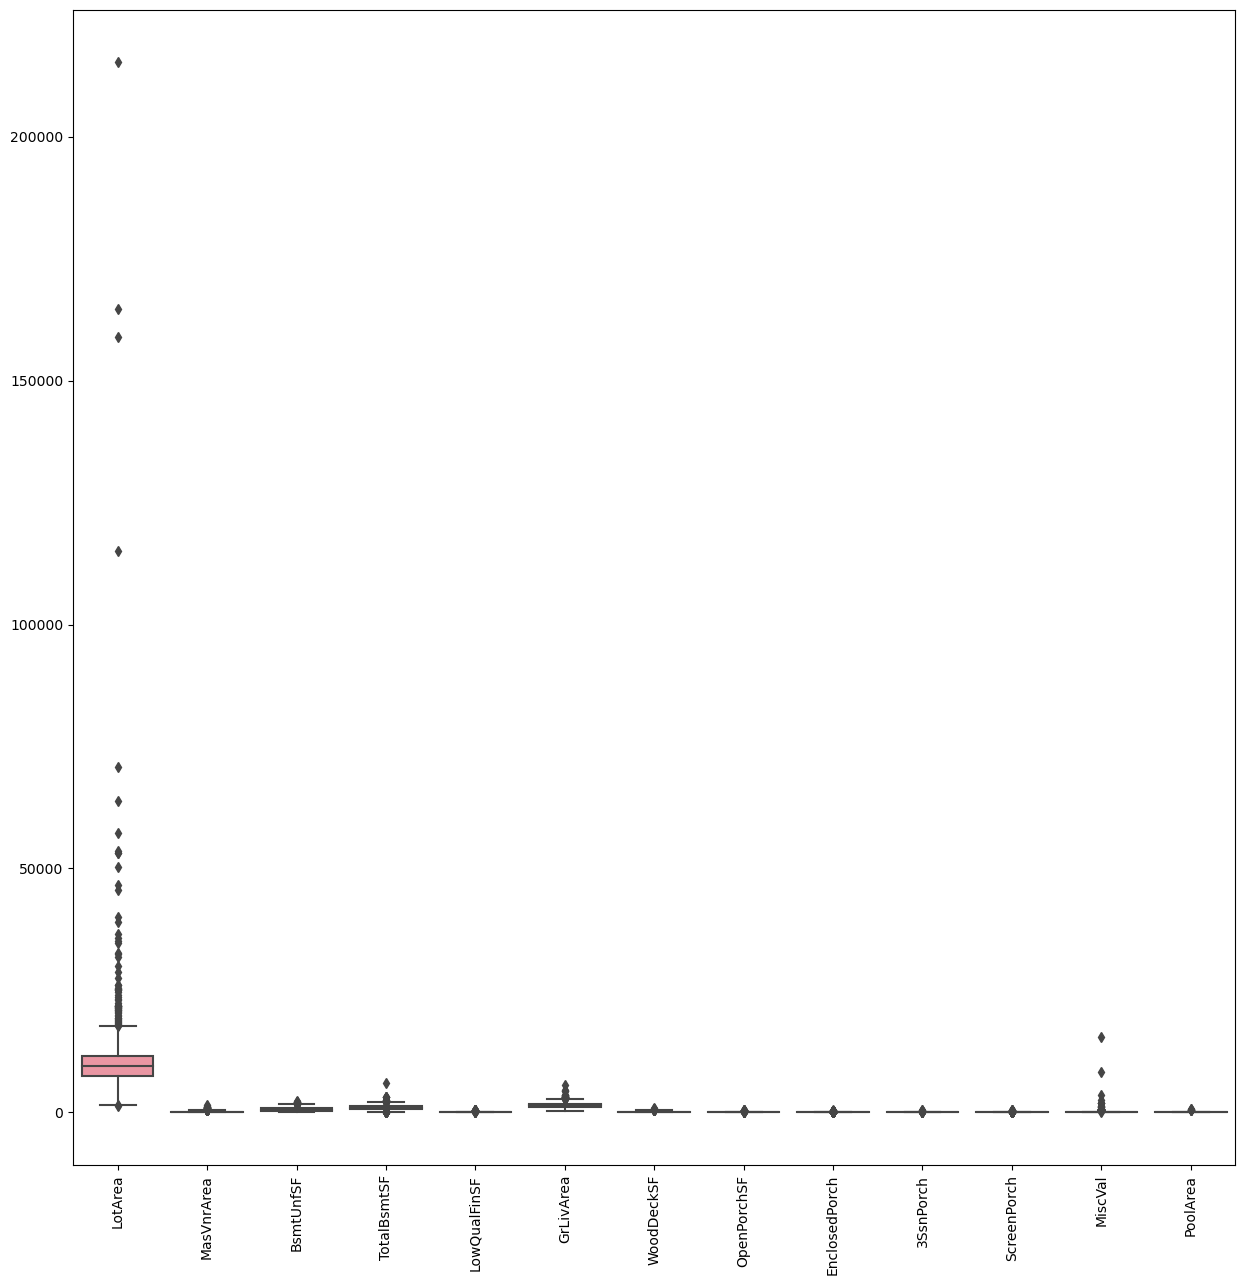

In [453]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=ds[outliar_cols]);

In [454]:
# Handling Outliar
for col in outliar_cols:
    ds[col][ds[col] <= ds[col].quantile(0.05)] = ds[col].quantile(0.05)
    ds[col][ds[col] >= ds[col].quantile(0.95)] = ds[col].quantile(0.95)

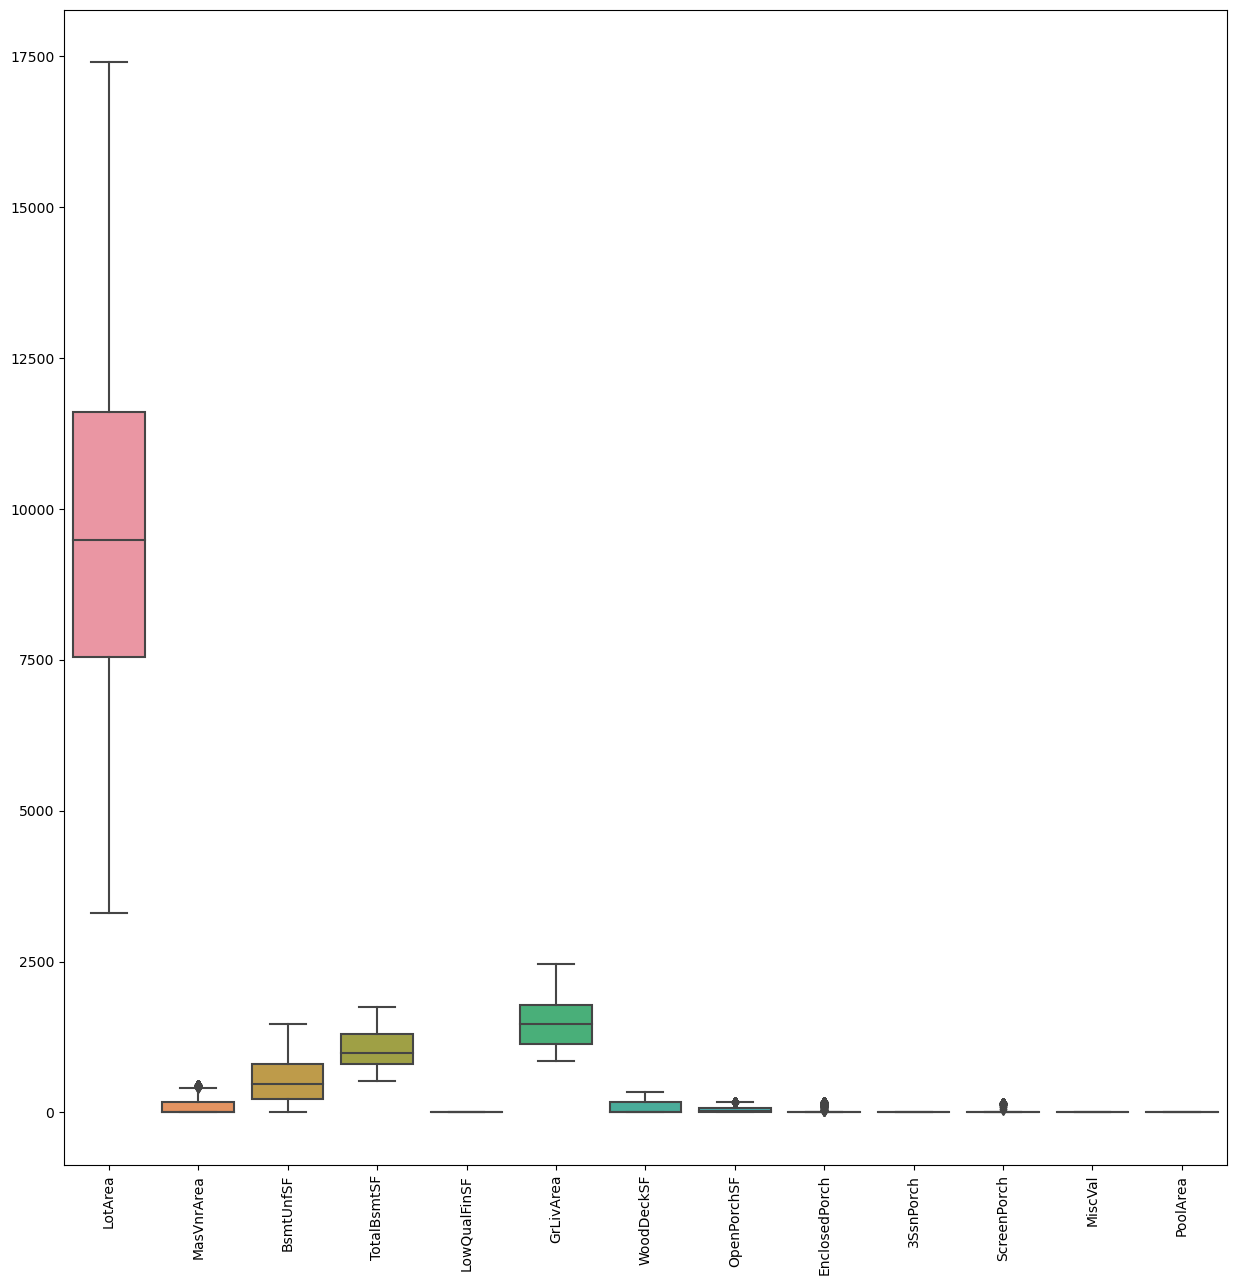

In [455]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=ds[outliar_cols]);

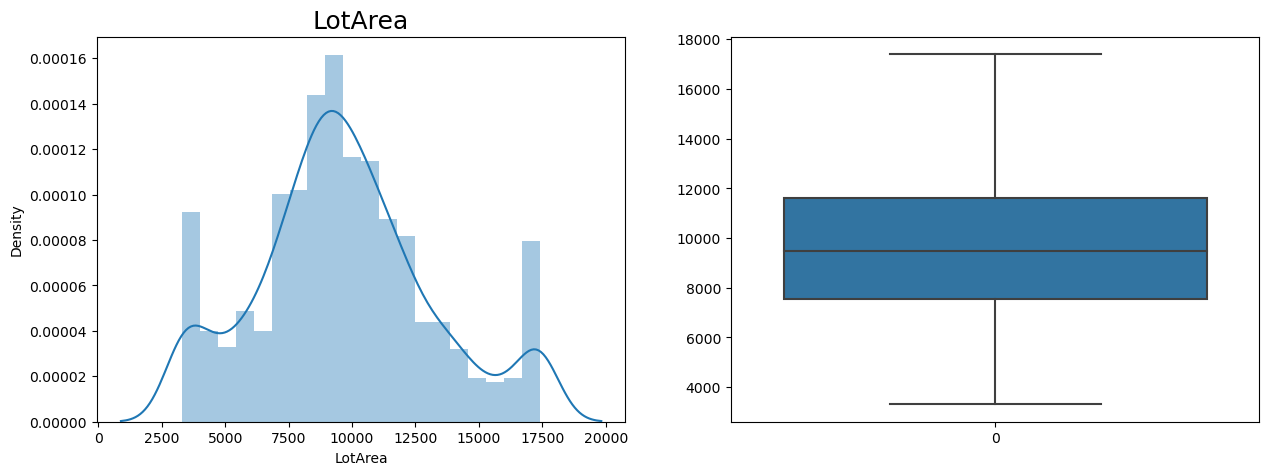

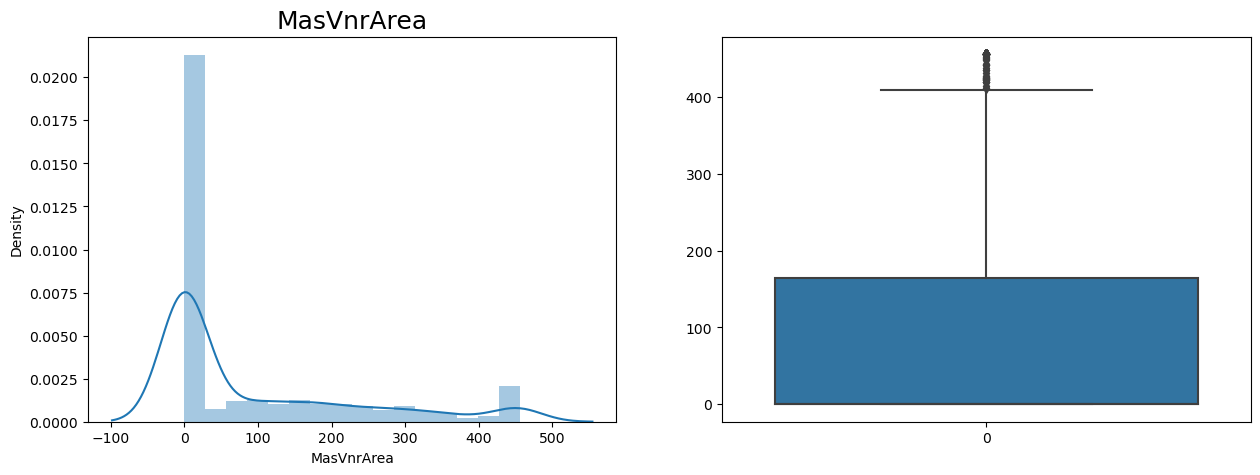

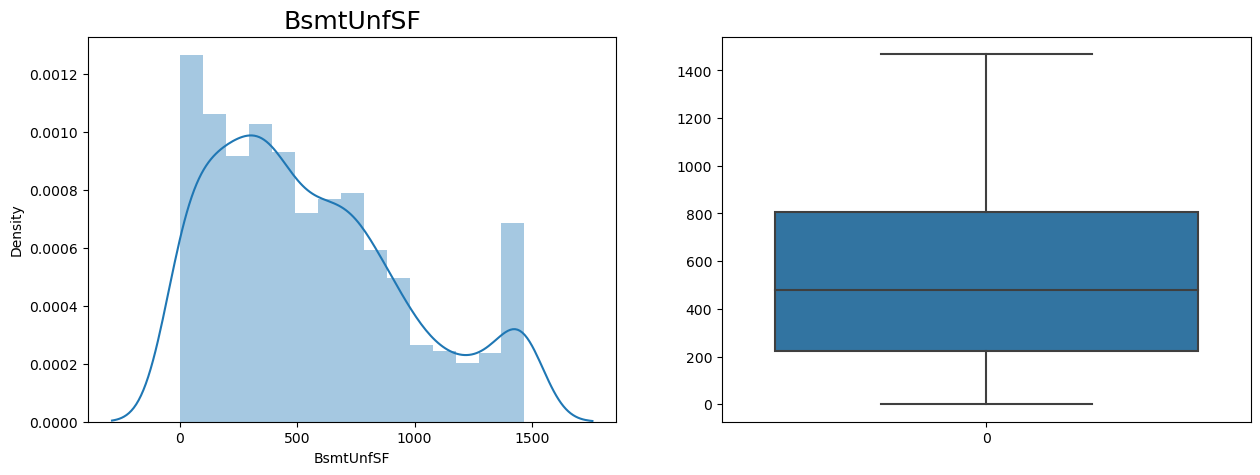

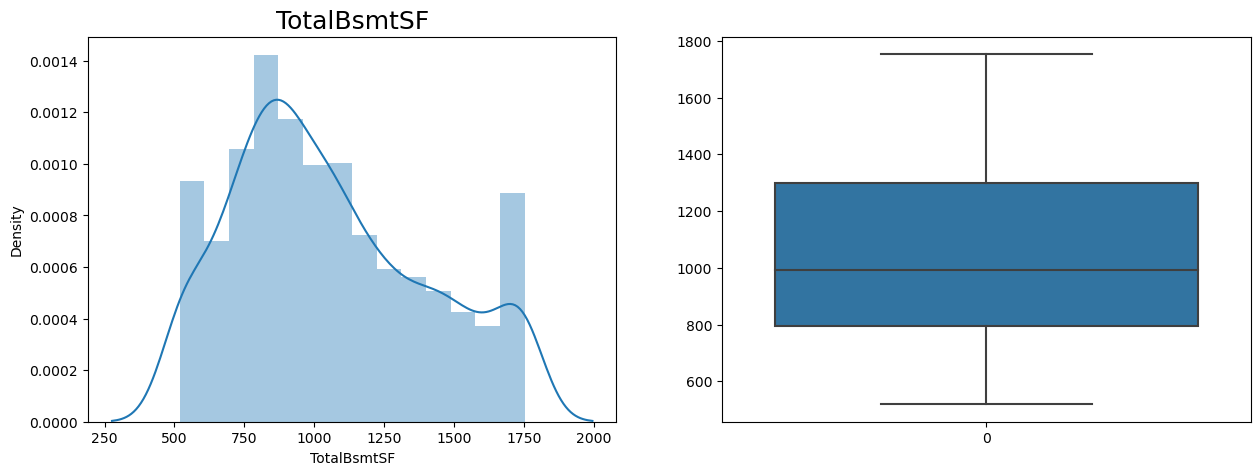

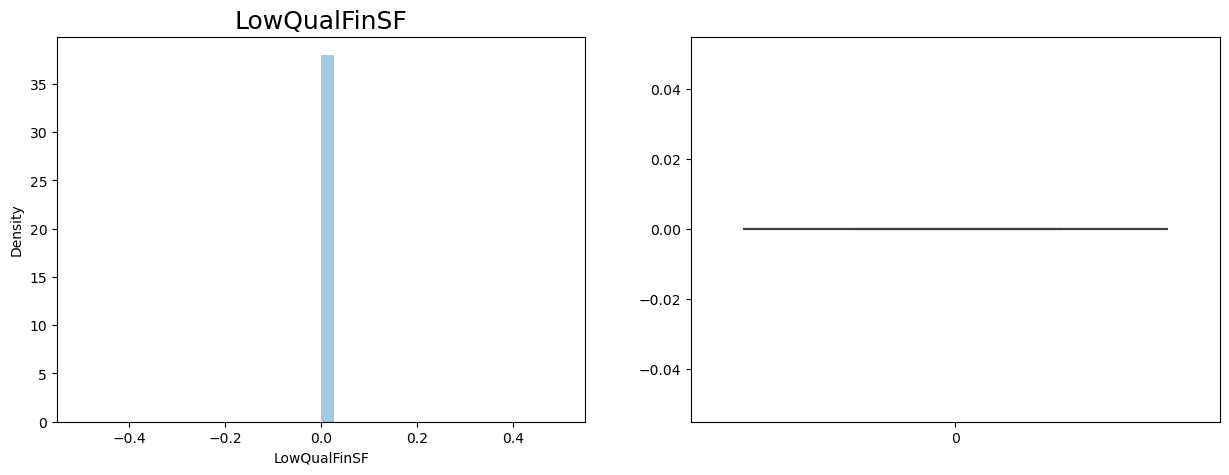

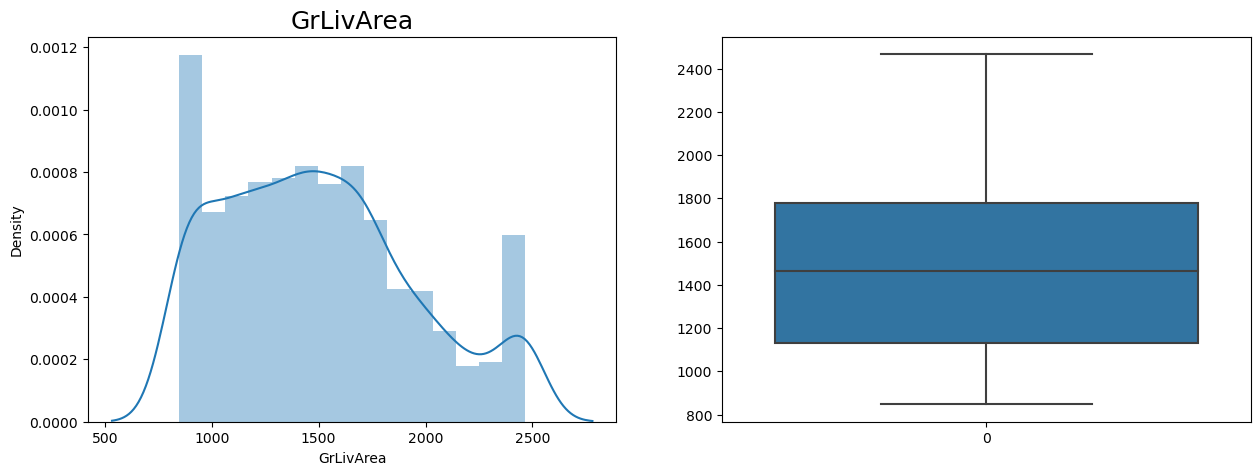

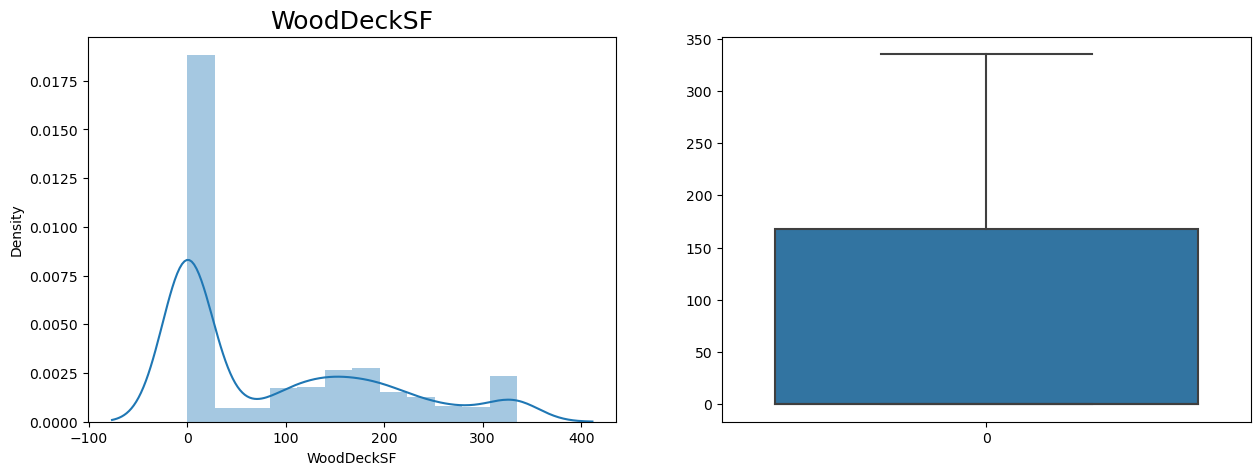

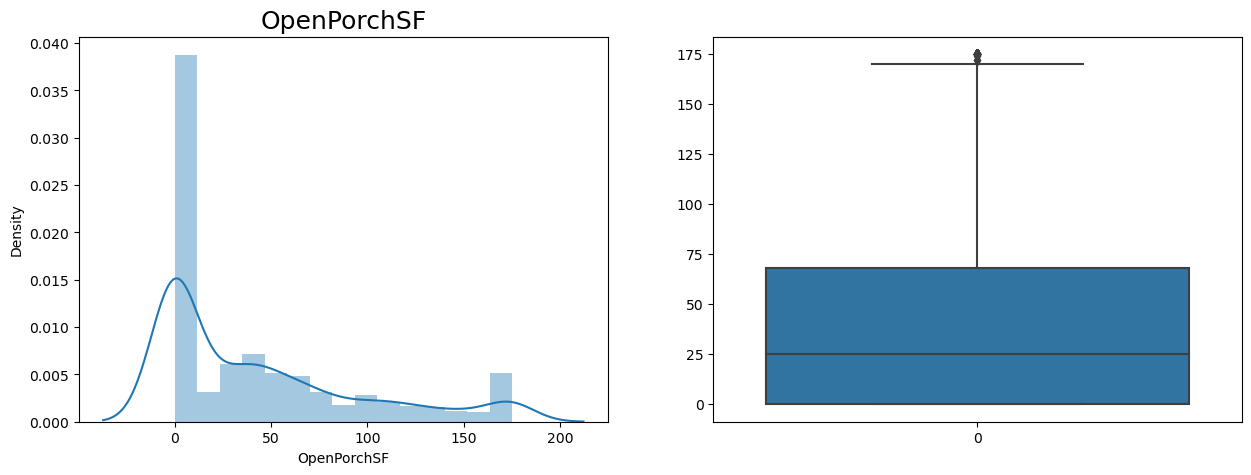

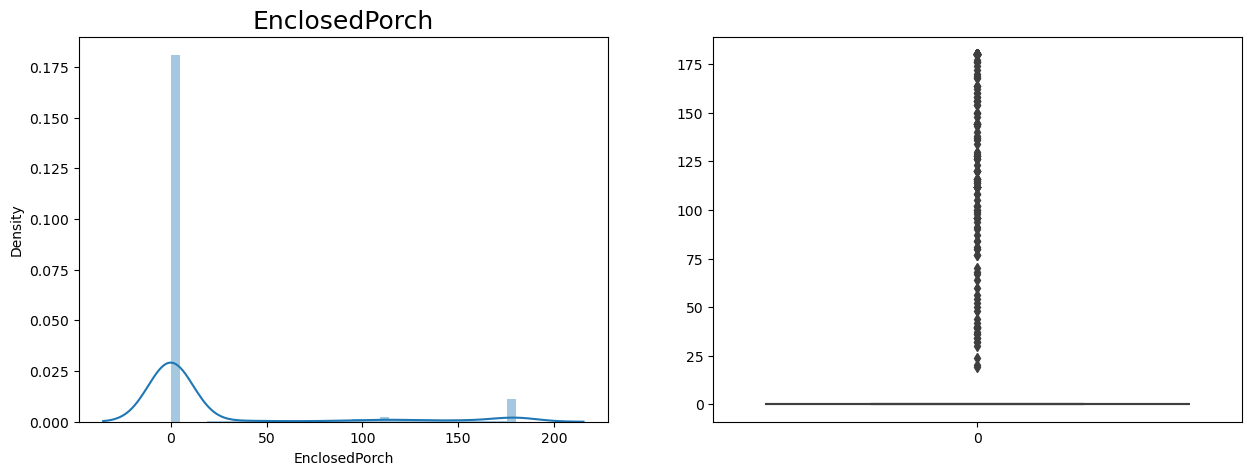

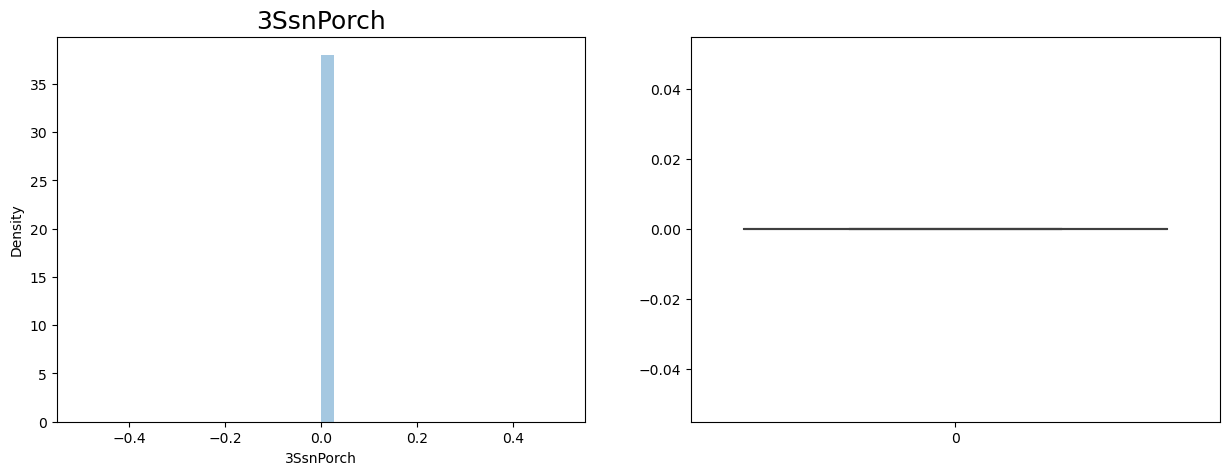

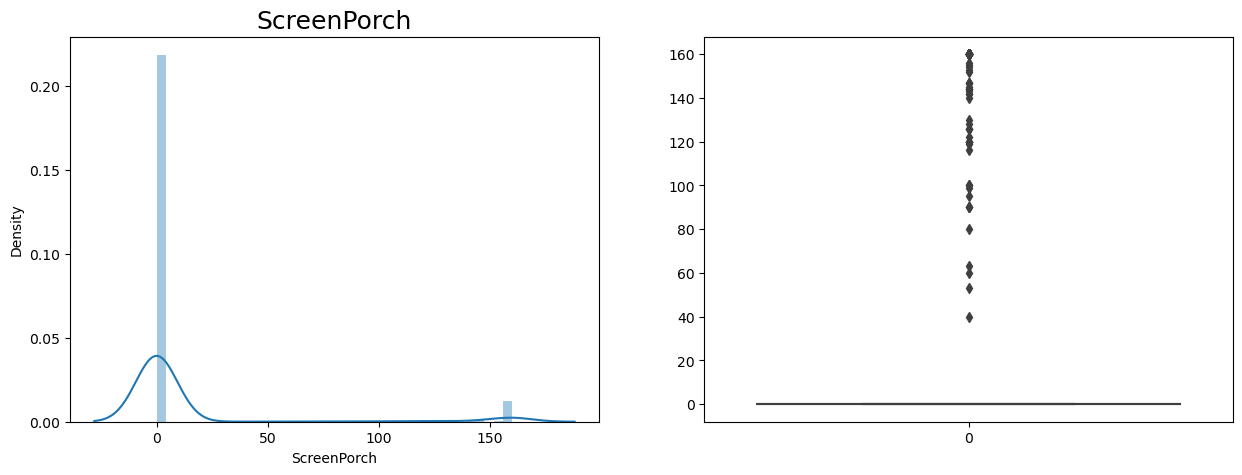

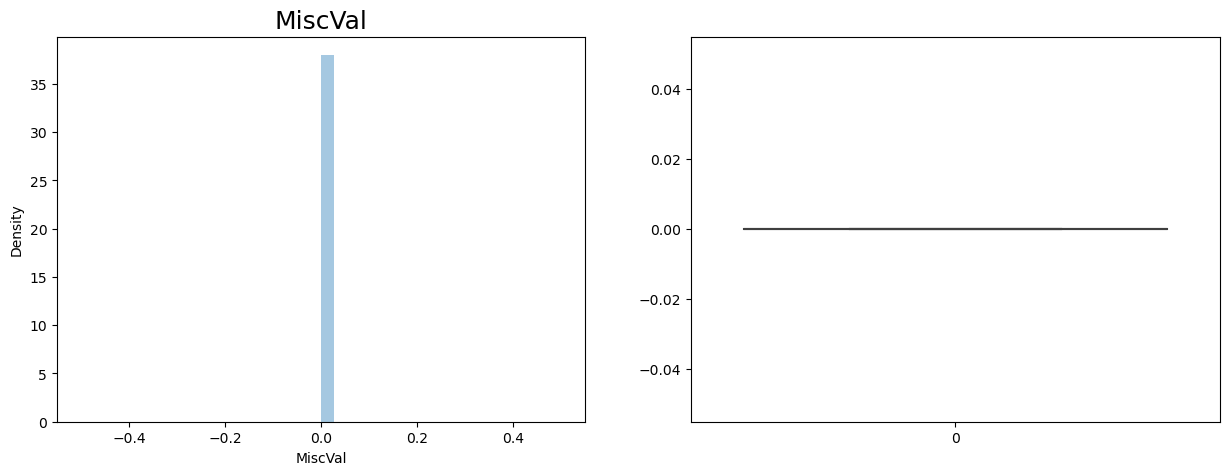

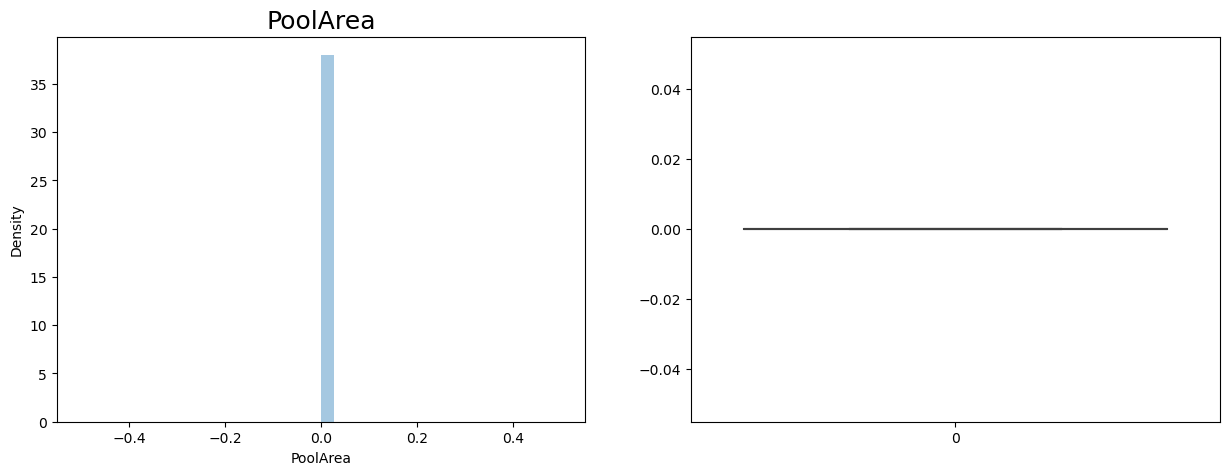

In [456]:
# Plot histograms and boxplots to visualize the distribution of otliar handeled numeric features

for col in outliar_cols:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(ds[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(ds[col])
    plt.show()

In [457]:
ds[outliar_cols].nunique().sort_values(ascending=False)

LotArea          959
GrLivArea        747
BsmtUnfSF        720
TotalBsmtSF      635
MasVnrArea       262
WoodDeckSF       211
OpenPorchSF      143
EnclosedPorch     73
ScreenPorch       29
LowQualFinSF       1
3SsnPorch          1
MiscVal            1
PoolArea           1
dtype: int64

In [458]:
# LowQualFinSF, PoolArea, MiscVal, 3SsnPorch are having unit value so can be drop from the dataset
ds=ds.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [459]:
outliar_cols = ['LotArea', 'MasVnrArea', 'BsmtUnfSF',
                'TotalBsmtSF', 'GrLivArea', 'WoodDeckSF',
                'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']

## Feature Engineering 

In [460]:
# Create new column for the age of the house
ds['PropertyAge'] = ds['YrSold'] - ds['YearBuilt']

## Drop the two columns from which we created new one
ds.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [461]:
# Numeric columns
num_cols = list(ds.select_dtypes(exclude='object').columns)

## Bivariate Analysis of Numeric Variables

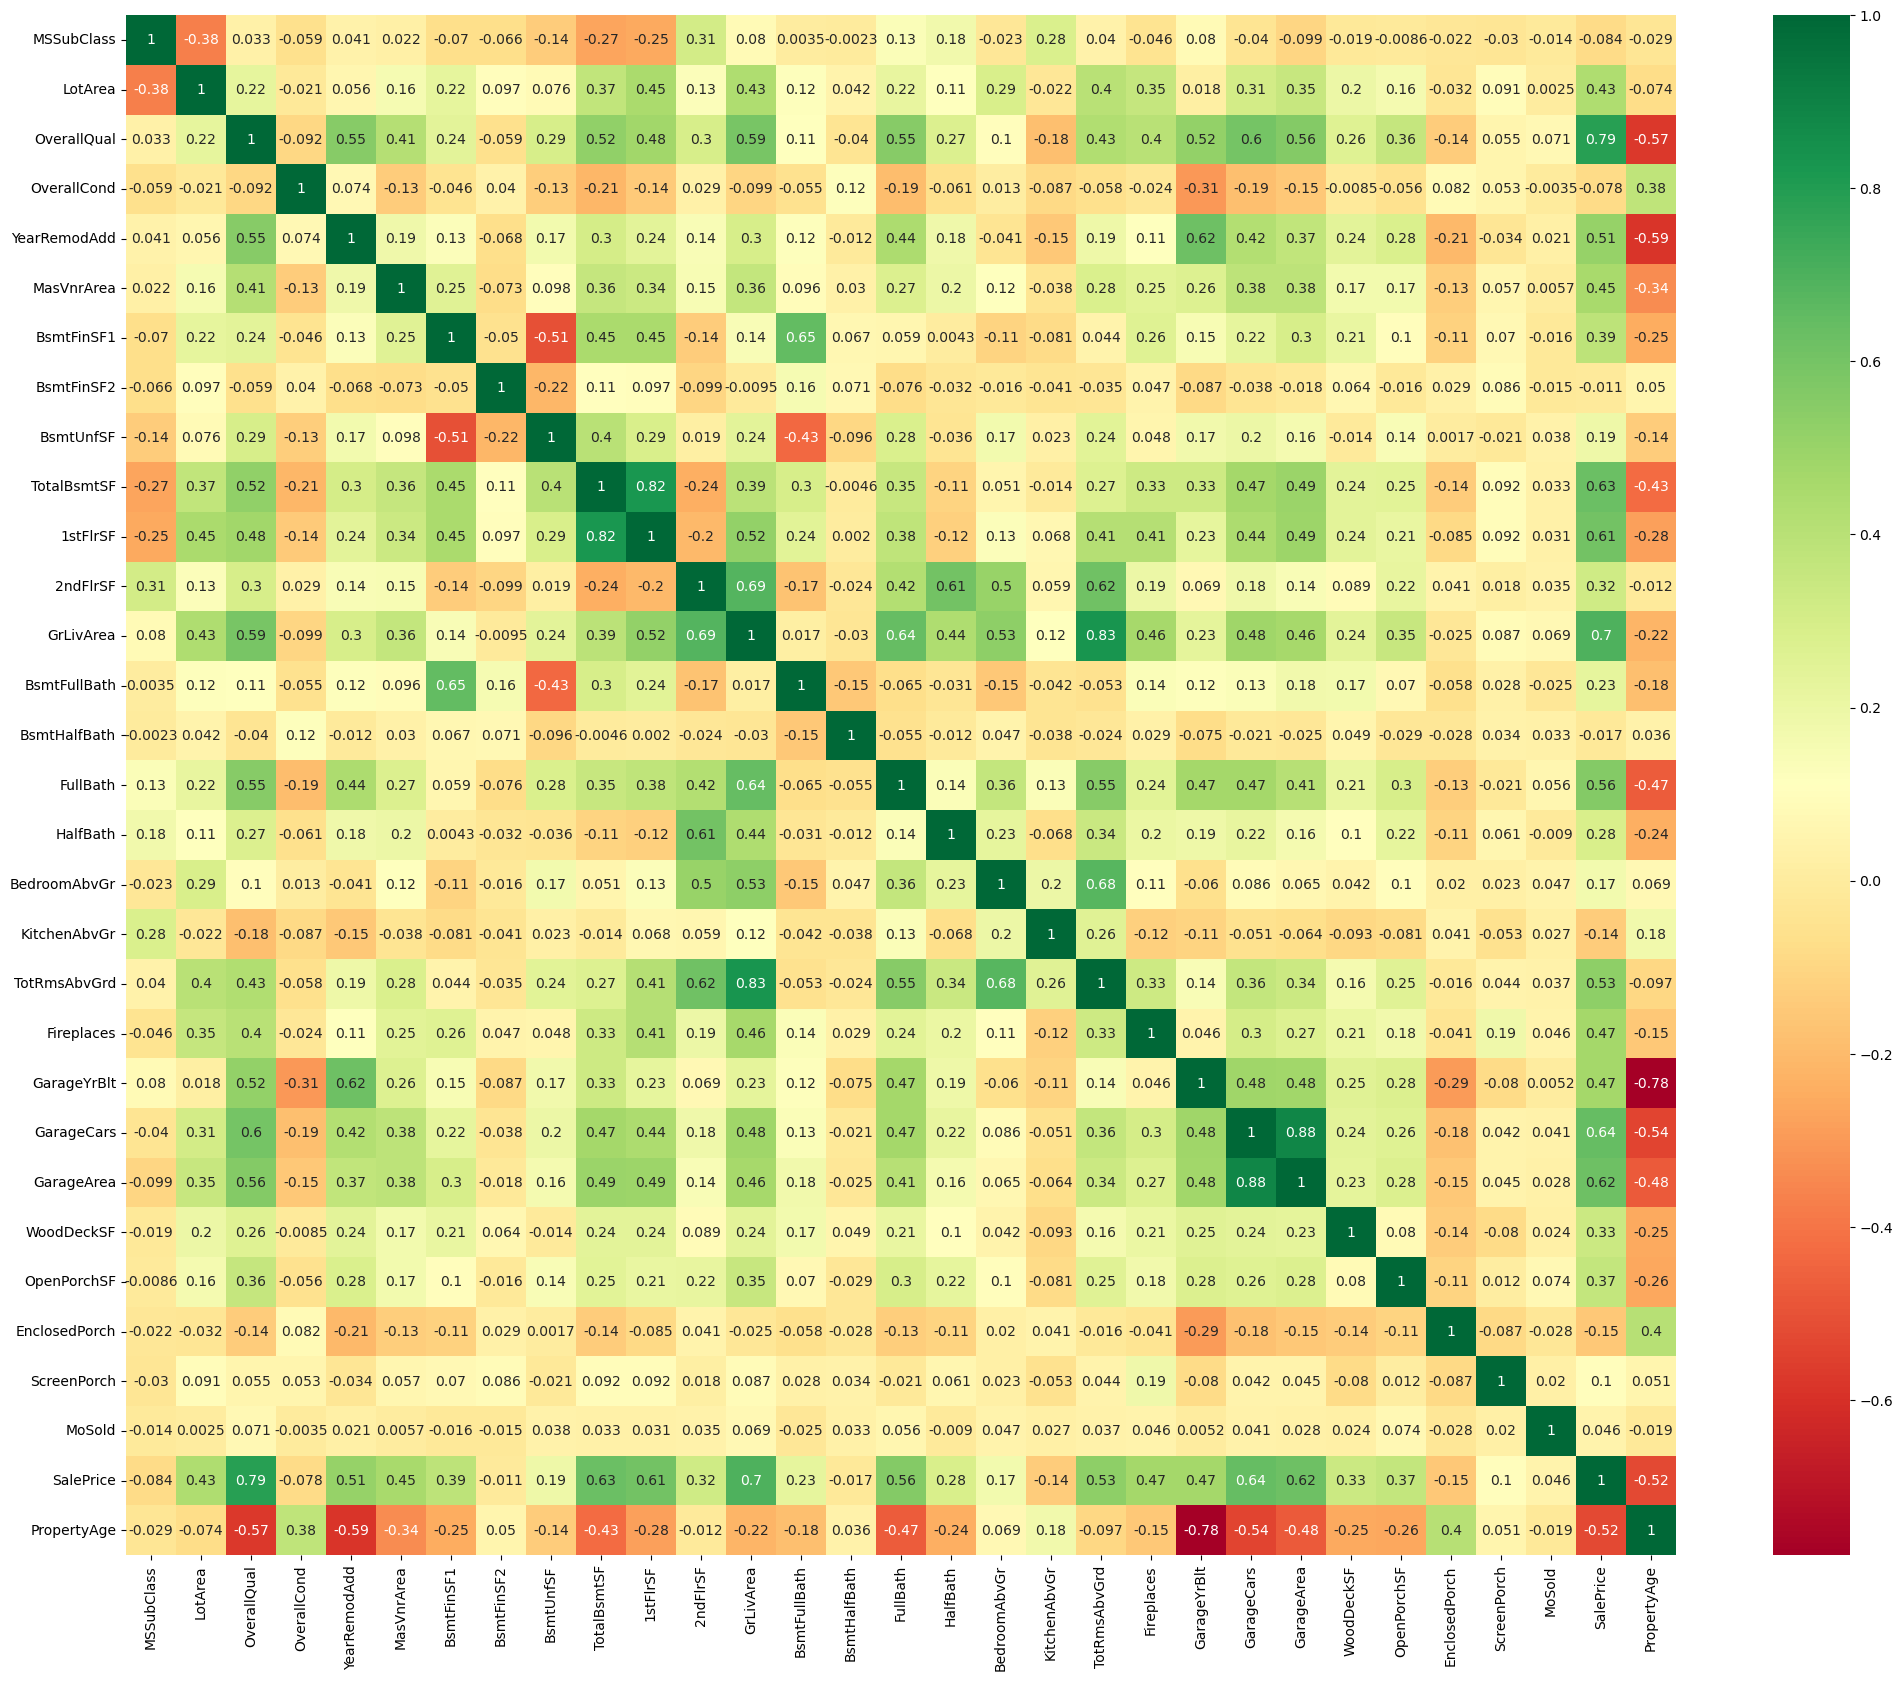

In [462]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(ds[num_cols].corr(), annot=True, cmap='RdYlGn');

### Categorical variable Univariate Analysis

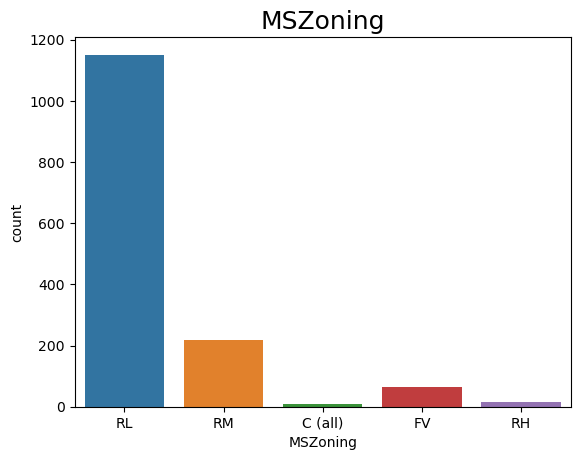

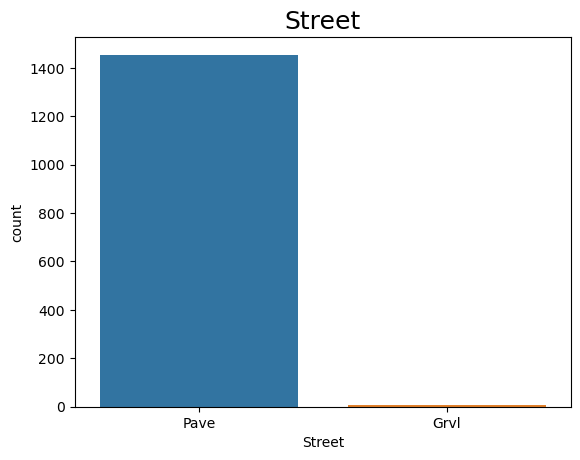

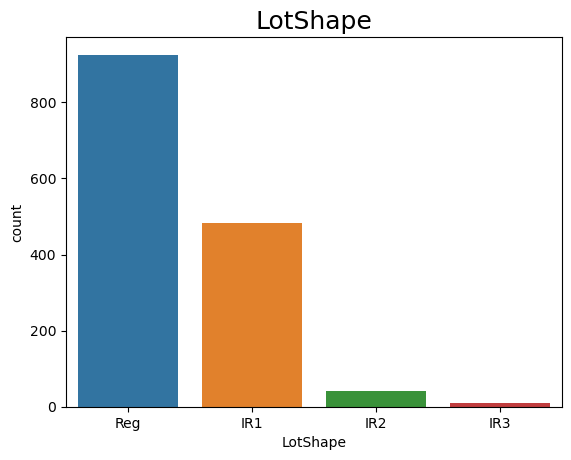

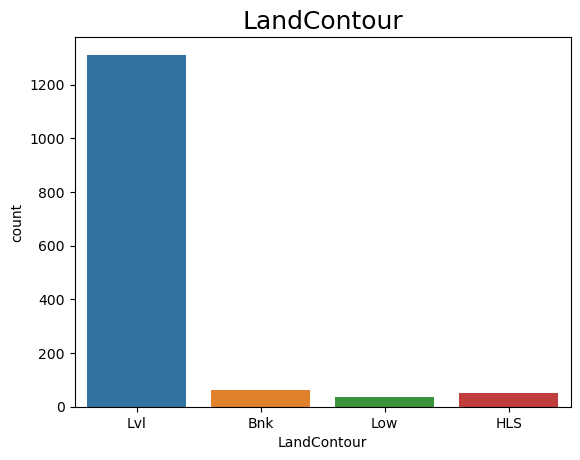

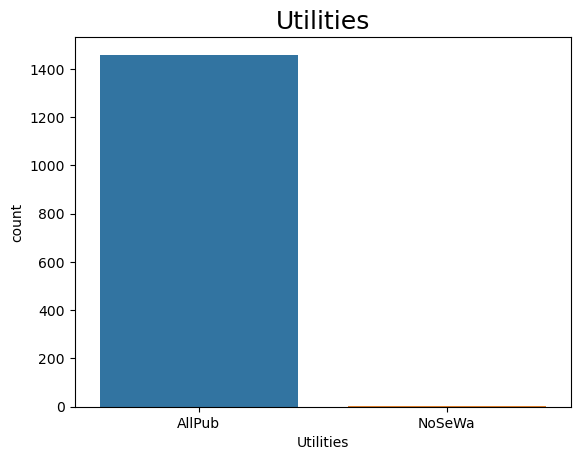

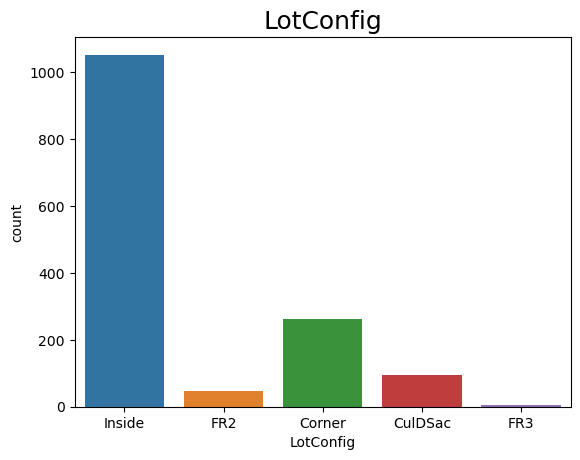

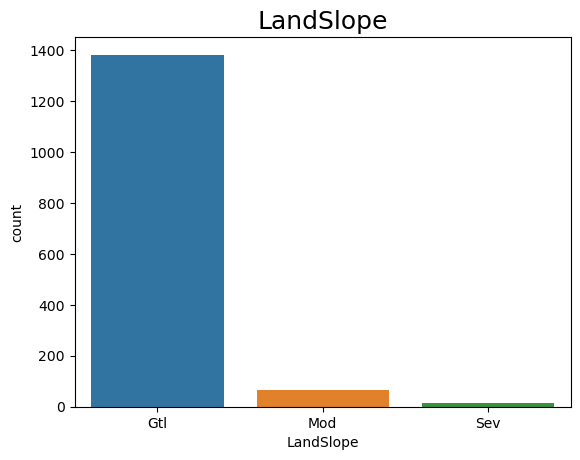

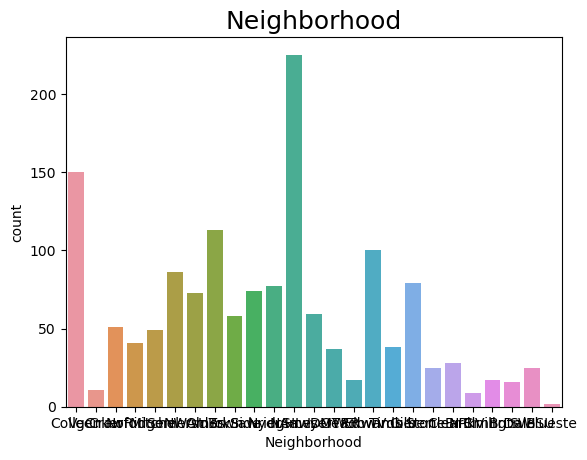

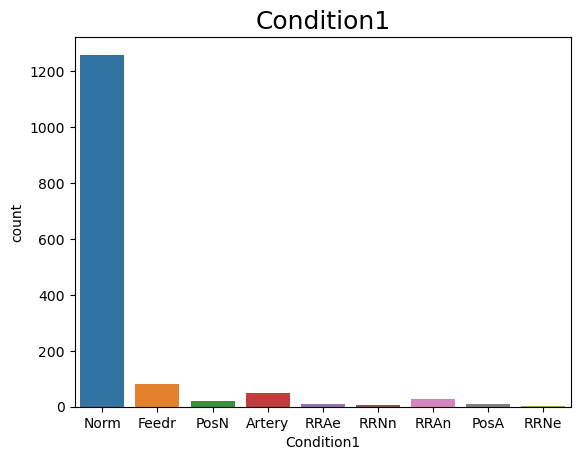

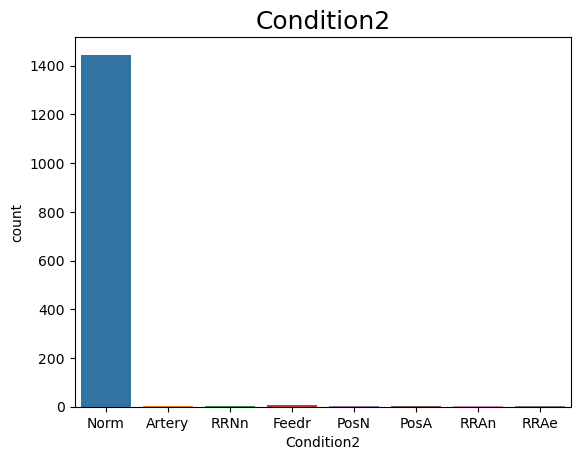

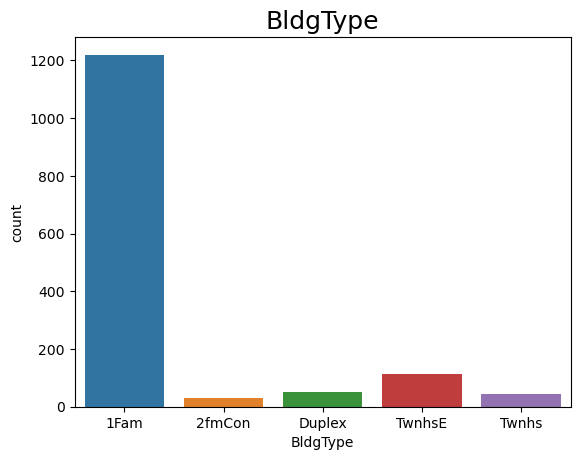

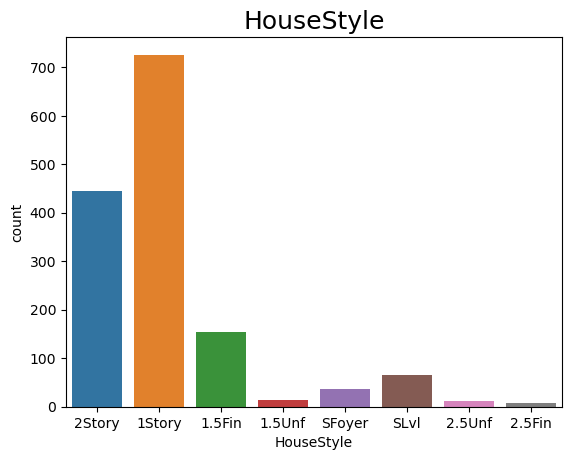

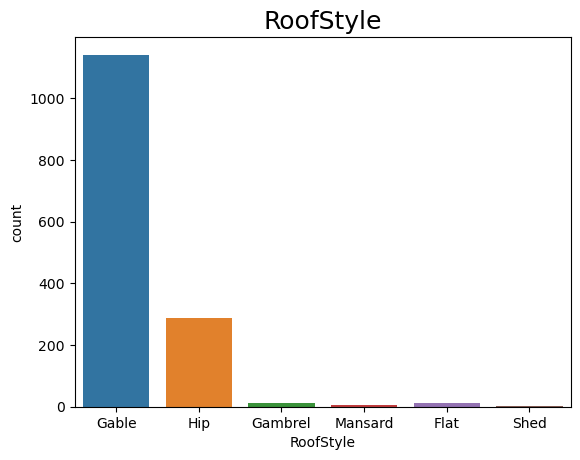

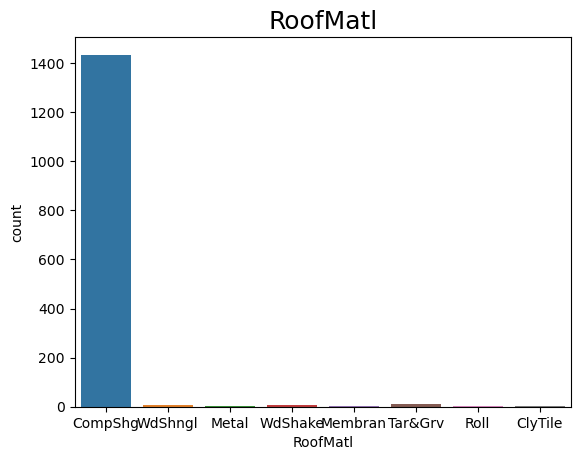

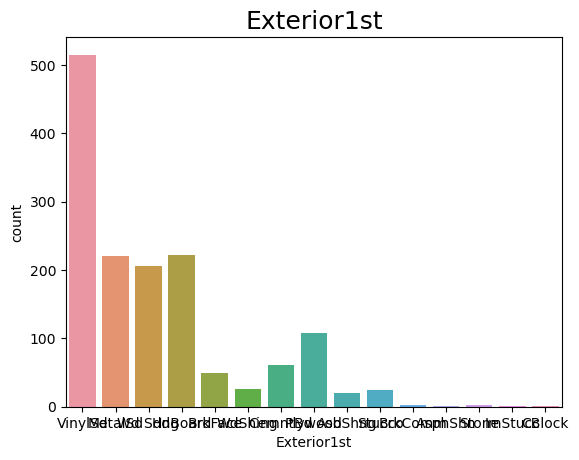

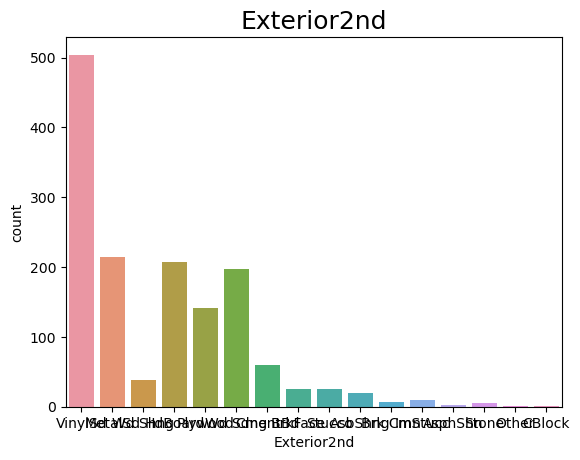

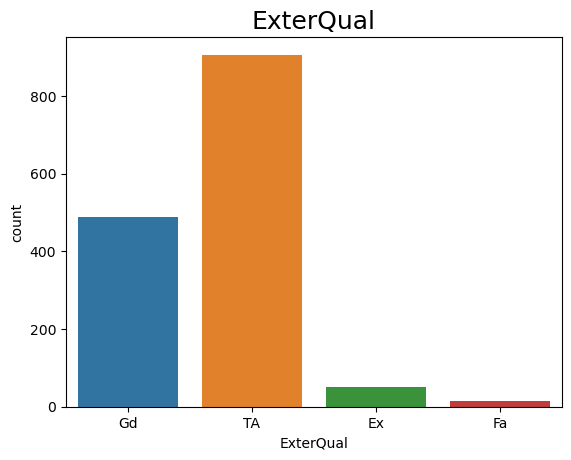

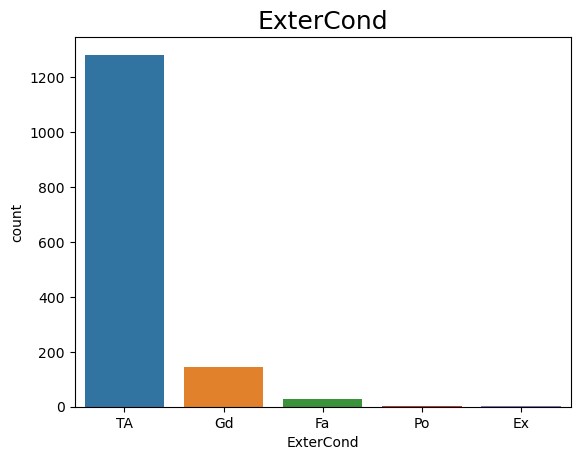

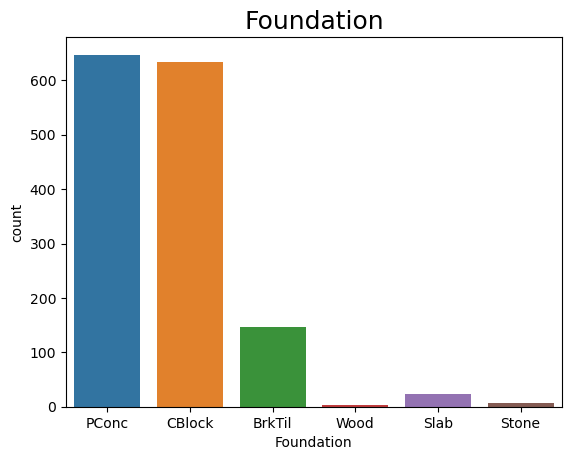

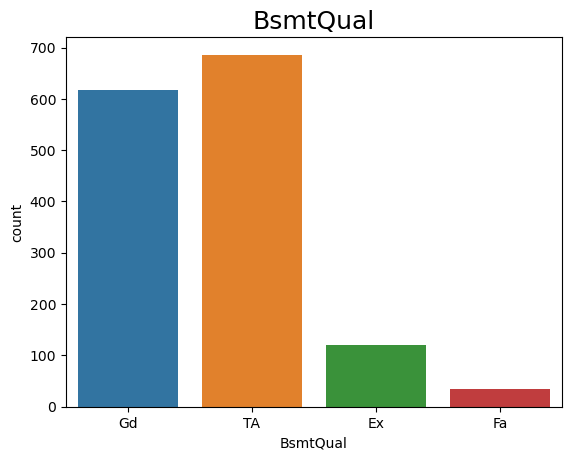

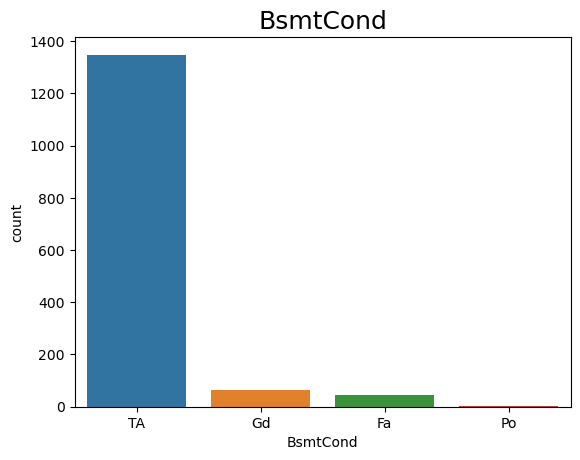

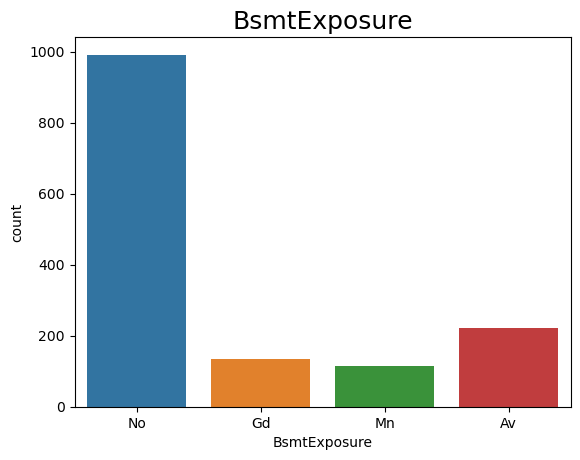

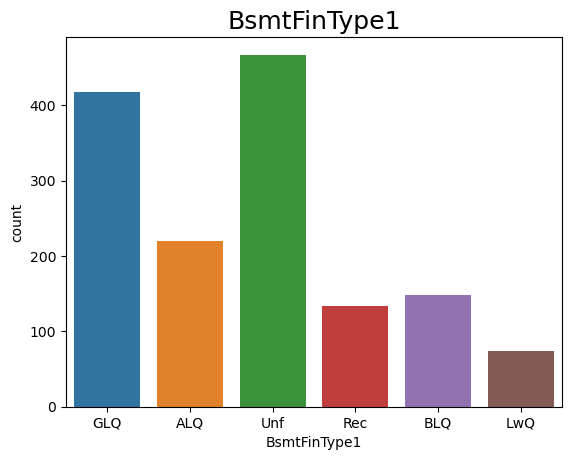

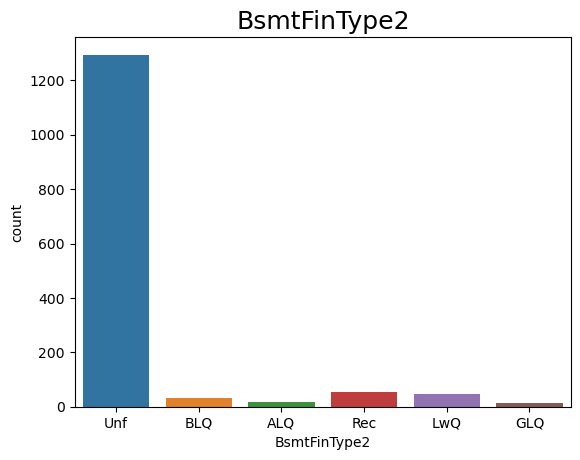

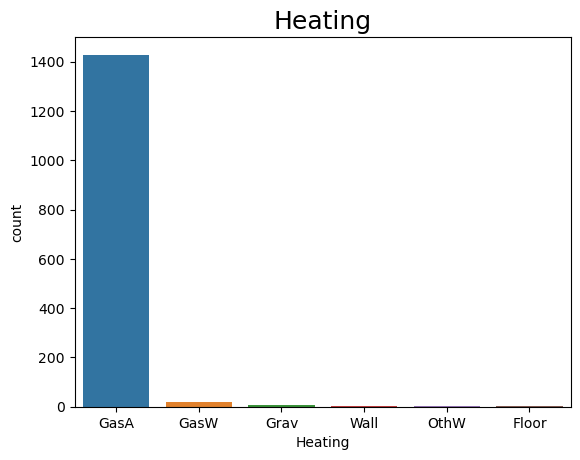

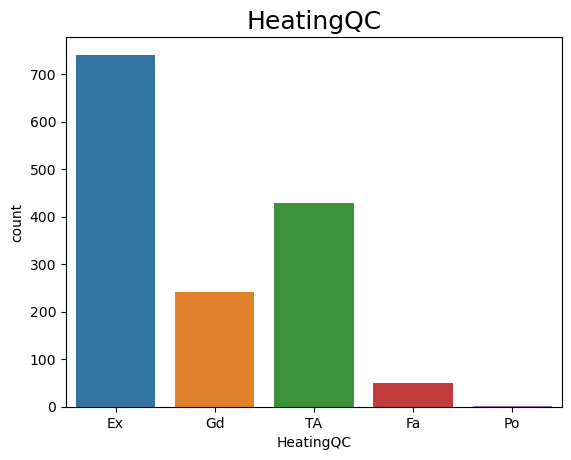

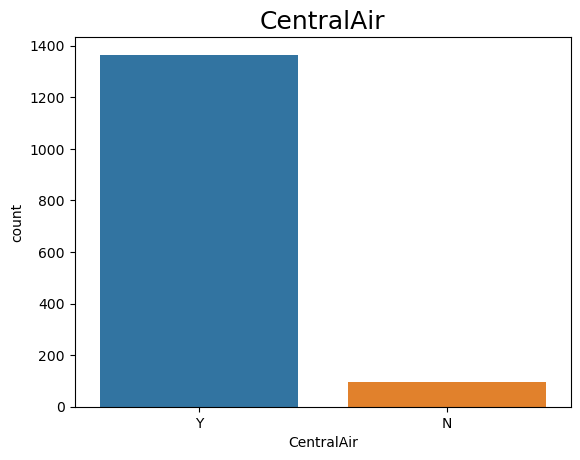

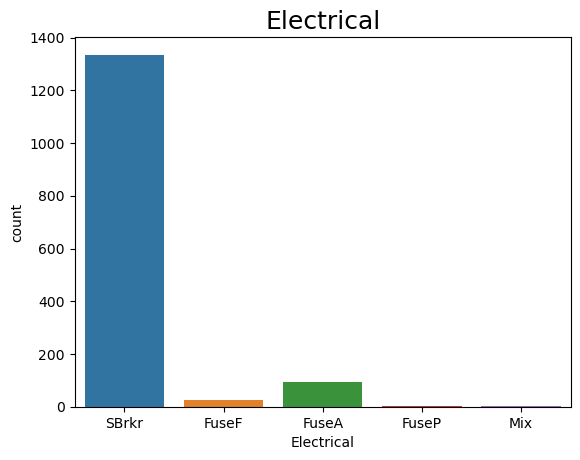

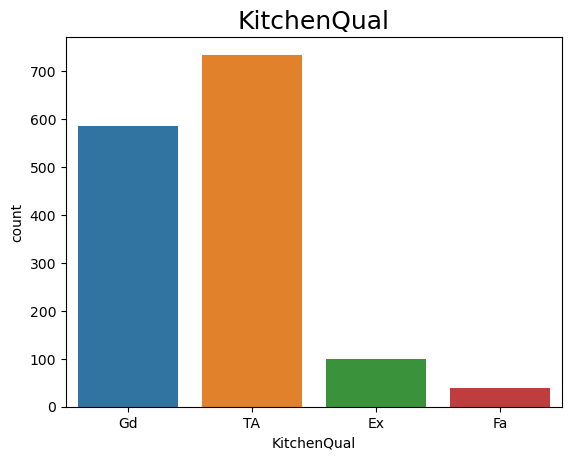

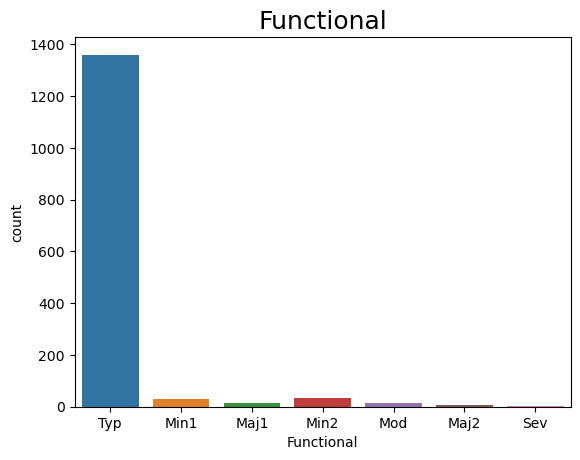

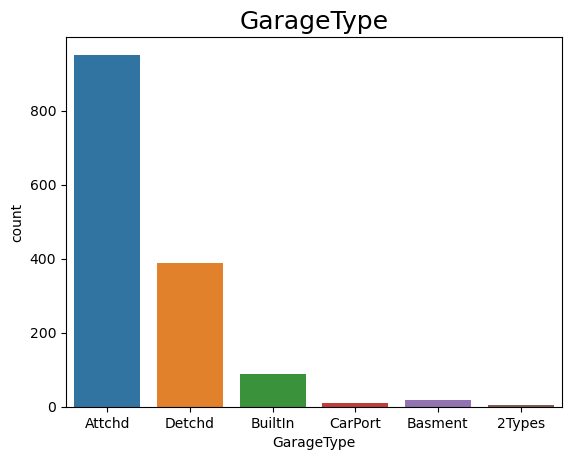

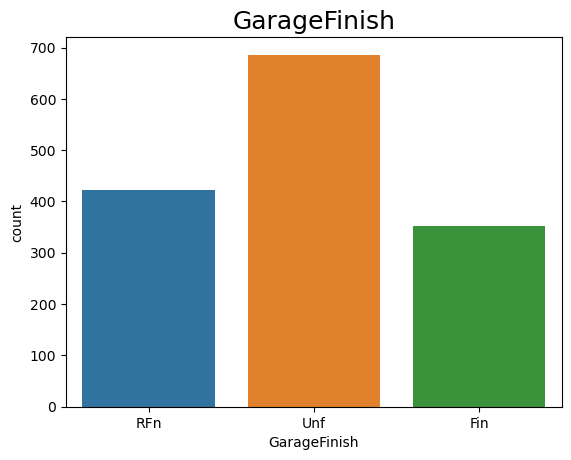

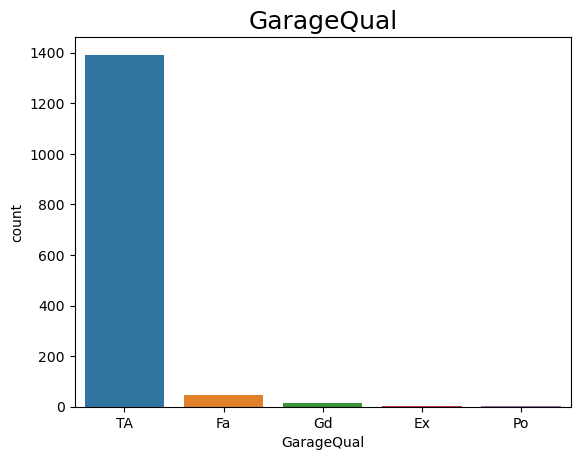

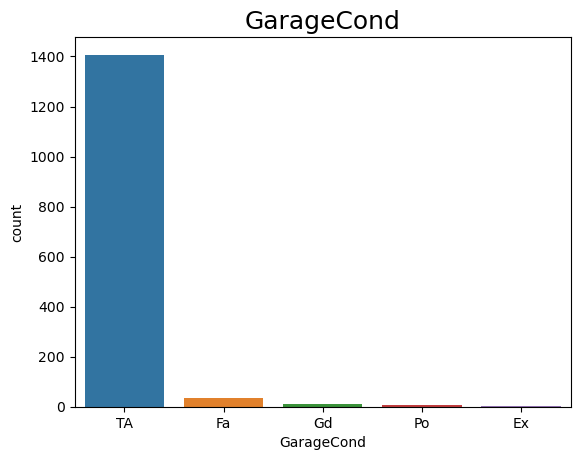

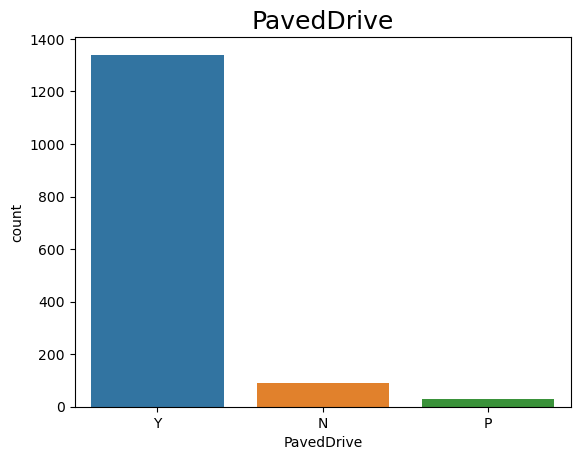

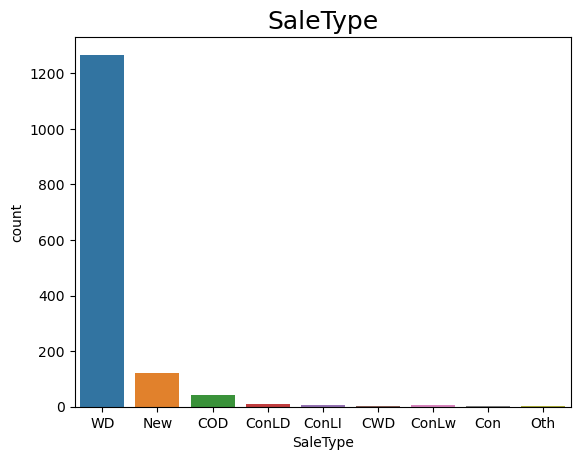

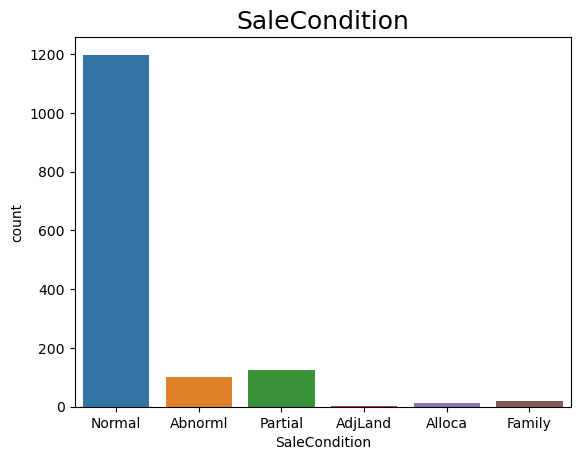

In [463]:
# Univariate analysis of categorical variables using bar plots
for col in cat_cols:
    plt.title(col, fontdict={'fontsize': 18})
    sns.countplot(x=ds[col])
    plt.show()

### All looks good in univariate analysis of Categorical variable analysis

# Dummy Variable Creation

In [464]:
ds_dummies = pd.get_dummies(ds[cat_cols], prefix=cat_cols, columns=cat_cols, drop_first=True)
ds_dummies.shape

(1460, 193)

In [465]:
ds_dummies.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=193)

In [466]:
# Add dummy variables to dataset
final_ds = pd.concat([ds, ds_dummies], axis=1)

In [467]:
# Drop old cat variables from data set
final_ds = final_ds.drop(cat_cols, axis=1)

In [468]:
final_ds.shape

(1460, 224)

# Train - Test Split

In [469]:
y=final_ds.pop('SalePrice')
X=final_ds

In [470]:
# X_train,X_test,y_train,y_test using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [471]:
# View dimensions of train test split data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 223)
(1168,)
(292, 223)
(292,)


# Feature Scaling

In [472]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

In [473]:
# Create a scaling instance
scaler = MinMaxScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [474]:
X_train[num_cols].describe()

MSSubClass      LotArea  OverallQual  OverallCond  YearRemodAdd  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      0.219883     0.452296     0.566495     0.571811      0.581621   
std       0.250387     0.244155     0.153514     0.138153      0.344743   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.297265     0.444444     0.500000      0.283333   
50%       0.176471     0.442409     0.555556     0.500000      0.733333   
75%       0.294118     0.587411     0.666667     0.625000      0.900000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean      0.201430     0.079963     0.032908     0.375632     0.437124  ...   
std       0.309059     0.082155     0.113389     0.284695     0.283200  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.147139     0.223474  ...   
50%       0.000000     0.069454     0.000000     0.313351     0.385588  ...   
75%       0.350877     0.127746     0.000000     0.550409     0.636054  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.202340     0.713309     0.443707     0.334484     0.266863   
std       0.213025     0.219004     0.186547     0.151085     0.329207   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.563636     0.250000     0.235896     0.000000   
50%       0.333333     0.713692     0.500000     0.338505     0.000000   
75%       0.333333     0.918182     0.500000     0.406206     0.501493   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       OpenPorchSF  EnclosedPorch  ScreenPorch       MoSold  PropertyAge  
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000  
mean      0.244768       0.116360     0.066470     0.485523     0.271964  
std       0.303778       0.291413     0.242208     0.249077     0.225087  
min       0.000000       0.000000     0.000000     0.000000     0.000000  
25%       0.000000       0.000000     0.000000     0.272727     0.058824  
50%       0.137104       0.000000     0.000000     0.454545     0.257353  
75%       0.389889       0.000000     0.000000     0.636364     0.406250  
max       1.000000       1.000000     1.000000     1.000000     1.000000  

[8 rows x 30 columns]

In [475]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [476]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-894340.1298686829
[-8.18239788e+03  2.36560894e+04  5.38972167e+04  3.98692890e+04
  6.11523086e+03  4.80714121e+03  2.85573158e+05  5.63156578e+04
  4.33425228e+04 -2.49276156e+04  5.49344132e+05  2.54648233e+05
 -1.22203087e+05  6.12737572e+03 -4.66589863e+03  5.38408253e+03
 -2.91398298e+03 -3.58645960e+04 -1.31415111e+04  1.89633784e+04
  7.22025564e+03  1.66442627e+03  7.69410786e+03  1.67773815e+04
  2.52380372e+03  6.91576769e+03  1.78549795e+03  4.31956056e+03
 -1.46060094e+03 -5.70795414e+04  2.03905791e+04  1.22975471e+04
  1.42619091e+04  1.18652004e+04  1.83562916e+04 -3.06419154e+03
  1.25625230e+04  5.38049340e+02  9.53435085e+02 -2.25995729e+03
  2.28941123e+03 -2.54113121e+04  5.81528002e+03 -9.71702108e+03
 -1.81837751e+04 -8.37821081e+02  5.30377711e+03  1.56001144e+04
  4.37262626e+03  3.68230799e+02  6.36072104e+03 -2.93909832e+03
 -5.64971250e+03  2.14836851e+04 -1.06448629e+04 -8.25844739e+03
  3.86186270e+01  1.12685015e+03 -1.53441691e+04 -9.78162755e+03
  1.95

In [477]:
from sklearn.metrics import r2_score, mean_squared_error

In [478]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9428034756374014
-3.3847864199520196e+21
419255956323.81757
6.354240355272689e+33
358952017.4005287
2.1761097107098247e+31


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [479]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [480]:
# Printing the best hyperparameter alpha
print(ridge_cv.best_params_)

{'alpha': 8.0}


In [481]:
#Fitting Ridge model for alpha = 8 
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.32130858e+04  2.29242877e+04  4.42676132e+04  2.69375647e+04
  1.08725624e+04  4.17391644e+03  3.11836332e+03 -4.85515312e+02
 -1.22168616e+04  4.22846582e+04  1.36114777e+04  4.09433973e+04
  4.87799635e+04  1.01516634e+04  1.14415290e+03  2.04458420e+04
  7.03957779e+03 -6.03991040e+03 -1.30080011e+04  1.72270129e+04
  1.49429107e+04  2.82643059e+03  2.12557786e+04  1.01400426e+04
  5.25176682e+03  2.84728679e+03 -8.74834183e+02  3.69810022e+03
 -2.11441157e+03 -1.11768290e+04  1.05262852e+04  4.87149222e+03
  3.64694578e+03  1.37719815e+03  3.00862427e+03 -9.22811630e+02
 -1.02802672e+04 -1.03530810e+03  1.01612017e+04  5.49644040e+03
  1.04782158e+04 -3.50886156e+03  7.86169545e+03 -1.12768696e+04
 -5.66418544e+03 -5.71203963e+02  5.29955250e+03  6.03099150e+03
 -5.36706938e+02 -3.45801109e+02  1.34672872e+03 -4.59842472e+03
 -5.03823638e+03  1.56200086e+04 -1.76704274e+04 -9.68426767e+03
 -7.99673165e+03 -5.20038843e+03 -1.57857778e+04 -1.05825799e+04
  4.29164725e+03 -8.45265

In [482]:
from sklearn.metrics import r2_score, mean_squared_error

In [483]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.89234904469805
0.8862094787400585
789091727465.2571
213618300397.12955
675592232.4188845
731569521.9079779


## Lasso

In [484]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [485]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 100}


In [486]:
#Fitting Ridge model for alpha = 100
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [487]:
lasso.coef_

array([-1.71025227e+04,  2.39329419e+04,  7.06099785e+04,  4.01738667e+04,
        9.12886105e+03,  1.14716927e+03, -0.00000000e+00, -0.00000000e+00,
       -2.03925018e+04,  5.71069466e+04,  0.00000000e+00,  6.27118786e+04,
        5.27458610e+04,  7.20752026e+03,  0.00000000e+00,  1.32400584e+04,
        3.36799555e+02, -2.89808150e+03, -1.20643119e+04,  5.89632570e+02,
        1.24482741e+04,  2.17019010e+03,  2.77702439e+04,  0.00000000e+00,
        3.24247711e+03,  7.57249470e+02, -0.00000000e+00,  2.11535246e+03,
       -1.06011357e+03, -2.48202023e+04,  8.24300498e+03,  0.00000000e+00,
        1.36691839e+03, -1.43054013e+03,  0.00000000e+00, -0.00000000e+00,
       -5.32656231e+03, -0.00000000e+00,  3.19130871e+03,  0.00000000e+00,
        5.95213669e+03, -0.00000000e+00,  7.91294347e+03, -8.56089587e+03,
       -0.00000000e+00,  0.00000000e+00,  2.11879069e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.13449072e+03, -0.00000000e+00,
        0.00000000e+00,  

In [488]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8958392295288058
0.8917102778571353
763508341144.6322
203291681402.81403
653688648.2402673
696204388.3658015


In [489]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.428035e-01      8.923490e-01      8.958392e-01
1   R2 Score (Test)      -3.384786e+21      8.862095e-01      8.917103e-01
2       RSS (Train)       4.192560e+11      7.890917e+11      7.635083e+11
3        RSS (Test)       6.354240e+33      2.136183e+11      2.032917e+11
4       MSE (Train)       1.894603e+04      2.599216e+04      2.556734e+04
5        MSE (Test)       4.664879e+15      2.704754e+04      2.638569e+04

## Lets observe the changes in the coefficients after regularization

In [490]:
betas = pd.DataFrame(index=X.columns)

In [491]:
betas.rows = X.columns

In [492]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [493]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear         Ridge         Lasso
MSSubClass             -8182.397882 -13213.085775 -17102.522703
LotArea                23656.089411  22924.287704  23932.941932
OverallQual            53897.216664  44267.613219  70609.978482
OverallCond            39869.288991  26937.564718  40173.866680
YearRemodAdd            6115.230861  10872.562415   9128.861047
MasVnrArea              4807.141214   4173.916437   1147.169273
BsmtFinSF1            285573.157722   3118.363322     -0.000000
BsmtFinSF2             56315.657753   -485.515312     -0.000000
BsmtUnfSF              43342.522754 -12216.861643 -20392.501754
TotalBsmtSF           -24927.615619  42284.658223  57106.946601
1stFlrSF              549344.132386  13611.477653      0.000000
2ndFlrSF              254648.232927  40943.397344  62711.878580
GrLivArea            -122203.086891  48779.963523  52745.861042
BsmtFullBath            6127.375721  10151.663356   7207.520258
BsmtHalfBath           -4665.898626   1144.152901      0.000000
FullBath                5384.082528  20445.841984  13240.058397
HalfBath               -2913.982985   7039.577787    336.799555
BedroomAbvGr          -35864.596029  -6039.910402  -2898.081500
KitchenAbvGr          -13141.511067 -13008.001100 -12064.311947
TotRmsAbvGrd           18963.378424  17227.012901    589.632570
Fireplaces              7220.255635  14942.910741  12448.274084
GarageYrBlt             1664.426270   2826.430589   2170.190105
GarageCars              7694.107863  21255.778642  27770.243890
GarageArea             16777.381464  10140.042649      0.000000
WoodDeckSF              2523.803725   5251.766818   3242.477115
OpenPorchSF             6915.767688   2847.286793    757.249470
EnclosedPorch           1785.497954   -874.834183     -0.000000
ScreenPorch             4319.560559   3698.100218   2115.352460
MoSold                 -1460.600939  -2114.411571  -1060.113575
PropertyAge           -57079.541407 -11176.829002 -24820.202320
MSZoning_FV            20390.579069  10526.285177   8243.004979
MSZoning_RH            12297.547136   4871.492221      0.000000
MSZoning_RL            14261.909073   3646.945779   1366.918388
MSZoning_RM            11865.200431   1377.198146  -1430.540134
Street_Pave            18356.291577   3008.624269      0.000000
LotShape_IR2           -3064.191542   -922.811630     -0.000000
LotShape_IR3           12562.522975 -10280.267236  -5326.562306
LotShape_Reg             538.049340  -1035.308100     -0.000000
LandContour_HLS          953.435085  10161.201707   3191.308713
LandContour_Low        -2259.957287   5496.440397      0.000000
LandContour_Lvl         2289.411227  10478.215765   5952.136688
Utilities_NoSeWa      -25411.312068  -3508.861561     -0.000000
LotConfig_CulDSac       5815.280021   7861.695450   7912.943465
LotConfig_FR2          -9717.021084 -11276.869644  -8560.895868
LotConfig_FR3         -18183.775077  -5664.185442     -0.000000
LotConfig_Inside        -837.821081   -571.203963      0.000000
LandSlope_Mod           5303.777109   5299.552498   2118.790689
LandSlope_Sev          15600.114357   6030.991501      0.000000
Neighborhood_Blueste    4372.626259   -536.706938      0.000000
Neighborhood_BrDale      368.230799   -345.801109      0.000000
Neighborhood_BrkSide    6360.721041   1346.728716   2134.490715
Neighborhood_ClearCr   -2939.098319  -4598.424720     -0.000000
Neighborhood_CollgCr   -5649.712499  -5038.236379      0.000000
Neighborhood_Crawfor   21483.685065  15620.008602  18169.659276
Neighborhood_Edwards  -10644.862882 -17670.427410 -10885.909347
Neighborhood_Gilbert   -8258.447386  -9684.267673  -2378.301534
Neighborhood_IDOTRR       38.618627  -7996.731650  -2801.388574
Neighborhood_MeadowV    1126.850147  -5200.388431     -0.000000
Neighborhood_Mitchel  -15344.169090 -15785.777781 -11488.238939
Neighborhood_NAmes     -9781.627545 -10582.579902  -5571.550253
Neighborhood_NPkVill   19598.176285   4291.647247      0.000000
Neighborhood_NWAmes    -9290.412385  -8452.658044  -3413.9190

In [494]:
# Ridge cross validation
ridgeCV_results= pd.DataFrame(ridge_cv.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008133      0.006531         0.001676        0.000521      0.0001   
1        0.008831      0.005235         0.001460        0.000233       0.001   
2        0.004991      0.001801         0.002063        0.001023        0.01   
3        0.005189      0.002144         0.001249        0.000065        0.05   
4        0.007303      0.002796         0.001565        0.000651         0.1   
5        0.004754      0.001116         0.001884        0.000851         0.2   
6        0.004952      0.001892         0.001660        0.000830         0.3   
7        0.004487      0.001181         0.001804        0.000808         0.4   
8        0.005087      0.001822         0.002797        0.002170         0.5   
9        0.004113      0.000511         0.001900        0.000831         0.6   
10       0.005492      0.001717         0.001628        0.000768         0.7   
11       0.004403      0.000994         0.001915        0.000850         0.8   
12       0.005020      0.001858         0.001626        0.000803         0.9   
13       0.004215      0.000755         0.002454        0.001634         1.0   
14       0.004480      0.001426         0.001765        0.000775         2.0   
15       0.005031      0.002089         0.001888        0.001204         3.0   
16       0.004835      0.001766         0.002018        0.001312         4.0   
17       0.006439      0.002461         0.001719        0.000748         5.0   
18       0.005815      0.002532         0.001745        0.000810         6.0   
19       0.007119      0.003039         0.001569        0.000433         7.0   
20       0.007084      0.003600         0.001363        0.000247         8.0   
21       0.005963      0.002485         0.002570        0.001123         9.0   
22       0.004316      0.000933         0.001862        0.001322        10.0   
23       0.006770      0.001985         0.002689        0.000997          20   
24       0.006707      0.003032         0.001639        0.000551          50   
25       0.008330      0.004178         0.001942        0.000905         100   
26       0.007222      0.003795         0.002055        0.000796         500   
27       0.005039      0.001575         0.002701        0.001509        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -18439.596577      -20354.585149   
1    {'alpha': 0.001}      -18385.969062      -20190.651544   
2     {'alpha': 0.01}      -18241.649306      -19145.490725   
3     {'alpha': 0.05}      -18708.603169      -17938.321039   
4      {'alpha': 0.1}      -19030.321692      -17587.169883   
5      {'alpha': 0.2}      -19319.961000      -17257.280056   
6      {'alpha': 0.3}      -19383.147722      -17108.050658   
7      {'alpha': 0.4}      -19378.848415      -16973.911757   
8      {'alpha': 0.5}      -19346.708250      -16858.260679   
9      {'alpha': 0.6}      -19302.361475      -16764.764062   
10     {'alpha': 0.7}      -19249.483880      -16677.169915   
11     {'alpha': 0.8}      -19203.196310      -16592.559445   
12     {'alpha': 0.9}      -19159.273879      -16519.069716   
13     {'alpha': 1.0}      -19113.540072      -16450.963838   
14     {'alpha': 2.0}      -18718.833194      -16011.474895   
15     {'alpha': 3.0}      -18476.022483      -15785.387223   
16     {'alpha': 4.0}      -18277.089660      -15670.580187   
17     {'alpha': 5.0}      -18105.550108      -15627.110112   
18     {'alpha': 6.0}      -17976.782892      -15615.210769   
19     {'alpha': 7.0}      -17877.679955      -15614.926053   
20     {'alpha': 8.0}      -17796.828898      -15640.077631   
21     {'alpha': 9.0}      -17750.113314      -15700.357196   
22    {'alpha': 10.0}      -17718.059402      -15765.229471   
23      {'alpha': 20}      -17542.348868      -16458.738736   
24      {'alpha': 50}      -17855.466417      -18248.417252   
25     {'alpha': 100}      -19100.088235     

In [495]:
# Lasso cross validation
lassoCV_results= pd.DataFrame(lasso_cv.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.271138      0.023871         0.002646        0.001046      0.0001   
1        0.251916      0.031663         0.002870        0.001789       0.001   
2        0.228573      0.001849         0.002796        0.001096        0.01   
3        0.288400      0.114651         0.005090        0.001636        0.05   
4        0.302781      0.049950         0.002630        0.001079         0.1   
5        0.267410      0.024650         0.002647        0.001184         0.2   
6        0.272171      0.034330         0.002005        0.001219         0.3   
7        0.300767      0.014130         0.003429        0.001907         0.4   
8        0.314971      0.024107         0.002819        0.001754         0.5   
9        0.323463      0.011407         0.003533        0.000971         0.6   
10       0.292702      0.024704         0.004610        0.002589         0.7   
11       0.293022      0.039881         0.001632        0.000193         0.8   
12       0.257778      0.040686         0.003905        0.001266         0.9   
13       0.240284      0.045707         0.004576        0.003449         1.0   
14       0.199017      0.078441         0.001642        0.000472         2.0   
15       0.205740      0.107737         0.002271        0.001246         3.0   
16       0.151573      0.027134         0.003142        0.001590         4.0   
17       0.141631      0.020460         0.002993        0.001363         5.0   
18       0.131764      0.014502         0.002527        0.001434         6.0   
19       0.136127      0.016060         0.002796        0.001789         7.0   
20       0.150966      0.042591         0.002235        0.000789         8.0   
21       0.125180      0.015352         0.002455        0.001172         9.0   
22       0.119222      0.018136         0.002265        0.001338        10.0   
23       0.077359      0.014651         0.002659        0.001638          20   
24       0.028593      0.005069         0.002355        0.001074          50   
25       0.021975      0.001301         0.001791        0.000842         100   
26       0.013239      0.001599         0.002876        0.000978         500   
27       0.012820      0.001333         0.001870        0.000769        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -18432.157210      -19246.175252   
1    {'alpha': 0.001}      -18432.012247      -19245.775457   
2     {'alpha': 0.01}      -18430.587540      -19241.703735   
3     {'alpha': 0.05}      -18424.184280      -19223.614692   
4      {'alpha': 0.1}      -18416.157724      -19201.952367   
5      {'alpha': 0.2}      -18399.999356      -19168.112333   
6      {'alpha': 0.3}      -18383.681421      -19132.853290   
7      {'alpha': 0.4}      -18367.333742      -19097.896509   
8      {'alpha': 0.5}      -18349.297150      -19063.650736   
9      {'alpha': 0.6}      -18333.267992      -19029.784304   
10     {'alpha': 0.7}      -18318.329424      -18997.993762   
11     {'alpha': 0.8}      -18303.116577      -18969.665449   
12     {'alpha': 0.9}      -18287.805297      -18944.731719   
13     {'alpha': 1.0}      -18272.257176      -18920.751155   
14     {'alpha': 2.0}      -18153.037088      -18701.854325   
15     {'alpha': 3.0}      -18044.054303      -18502.479592   
16     {'alpha': 4.0}      -17955.919962      -18301.631189   
17     {'alpha': 5.0}      -17919.249224      -18114.376231   
18     {'alpha': 6.0}      -17899.295551      -17937.884567   
19     {'alpha': 7.0}      -17891.634641      -17760.465540   
20     {'alpha': 8.0}      -17883.236355      -17610.283230   
21     {'alpha': 9.0}      -17863.149177      -17464.067907   
22    {'alpha': 10.0}      -17829.693528      -17344.691742   
23      {'alpha': 20}      -17866.014281      -16611.158195   
24      {'alpha': 50}      -18152.481210      -16609.968617   
25     {'alpha': 100}      -17981.512147     

In [496]:
# Top 10 coefficients of Ridge
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               48779.963523
OverallQual             44267.613219
TotalBsmtSF             42284.658223
2ndFlrSF                40943.397344
Neighborhood_NoRidge    39162.922164
RoofMatl_WdShngl        32578.248888
OverallCond             26937.564718
Neighborhood_StoneBr    24247.204375
LotArea                 22924.287704
Neighborhood_NridgHt    22057.701995
Name: Ridge, dtype: float64

In [497]:
# Top 10 coefficients of Lasso
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual             70609.978482
RoofMatl_WdShngl        62971.812024
2ndFlrSF                62711.878580
TotalBsmtSF             57106.946601
GrLivArea               52745.861042
Neighborhood_NoRidge    48222.896165
OverallCond             40173.866680
Neighborhood_StoneBr    28465.469979
GarageCars              27770.243890
Neighborhood_NridgHt    24958.169363
Name: Lasso, dtype: float64

# Problem Statemnt Part - 1

### Q1. Which variables are significant in predicting the price of a house

Below are the top 10 features which are significantly predicting the house price
- OverallQual
- RoofMatl_WdShngl
- 2ndFlrSF 
- TotalBsmtSF
- GrLivArea       
- Neighborhood_NoRidge
- OverallCond       
- Neighborhood_StoneBr
- GarageCars          
- Neighborhood_NridgHt

### Q2.  How well those variables describe the price of a house

- OverallQual: If overall quality of construction is good then definitly the price will increase
- GrLivArea: If Living area size increased it would be more spacious and it will increase the house price
- OverallCond:Overall condition will definitly attract a high price
- Neighborhood: Houses in good neighbouring locations also attracts high price
- GarageCars: People having multiple veichle also needs more Garage Space and increase in Garage Space will increaee the price

# Subjective Questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Optimal value of lambda for Ridge Regression = 8
<br>
Optimal value of lambda for Lasso = 100
<br>
After doubling new values would be 
<br>
New value of lambda for Ridge Regression = 16
<br>
New value of lambda for Lasso = 200

In [498]:
#Fitting Ridge model for alpha = 8 
alpha = 16
ridge_new = Ridge(alpha=alpha)

ridge_new.fit(X_train, y_train)

Ridge(alpha=16)

In [499]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge_new.predict(X_train)
y_pred_test = ridge_new.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8818637692621654
0.8792206963644688
865949792342.0983
226738301926.15375
741395370.1559061
776501033.9936773


In [500]:
#Fitting Ridge model for alpha = 200
alpha =200

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train, y_train)

Lasso(alpha=200)

In [501]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_new.predict(X_train)
y_pred_test = lasso_new.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8805995510381768
0.8869442320253558
875216632004.2461
212238952220.51074
749329308.2228135
726845726.7825711


In [502]:
# Top 10 coefficients of Ridge
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               48779.963523
OverallQual             44267.613219
TotalBsmtSF             42284.658223
2ndFlrSF                40943.397344
Neighborhood_NoRidge    39162.922164
RoofMatl_WdShngl        32578.248888
OverallCond             26937.564718
Neighborhood_StoneBr    24247.204375
LotArea                 22924.287704
Neighborhood_NridgHt    22057.701995
Name: Ridge, dtype: float64

In [503]:
# Top 10 coefficients of Lasso
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual             70609.978482
RoofMatl_WdShngl        62971.812024
2ndFlrSF                62711.878580
TotalBsmtSF             57106.946601
GrLivArea               52745.861042
Neighborhood_NoRidge    48222.896165
OverallCond             40173.866680
Neighborhood_StoneBr    28465.469979
GarageCars              27770.243890
Neighborhood_NridgHt    24958.169363
Name: Lasso, dtype: float64

### R2 Score got decreased for both the case

Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

I will use Lass as it takes care of unnecessary features and reduce overfitting situation

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [504]:
#Top 5 lasso predictors
remove = ['OverallQual', 'RoofMatl_WdShngl', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea']
X_train_new = X_train.drop(remove, axis=1)
X_test_new = X_test.drop(remove, axis=1)

In [507]:
lasso = Lasso()

# cross validation
lasso_cv_drop = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_drop.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [508]:
lasso_cv_drop.best_params_

{'alpha': 100}

In [509]:
#Fitting Ridge model for alpha = 200
alpha =100

lasso_drop = Lasso(alpha=alpha)
        
lasso_drop.fit(X_train_new, y_train)

Lasso(alpha=100)

In [510]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_drop.predict(X_train_new)
y_pred_test = lasso_drop.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8746763154775654
0.8624805708903953
918634511275.2336
258164444566.25394
786502150.0644124
884124810.1584039


In [512]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [513]:
# Top 10 coefficients of Lasso
betas['Lasso'].sort_values(ascending=False)[:10]

KeyError: 'Lasso'